# Capstone Supply Chain

A FMCG company has entered into the instant noodles business two years back. Their higher
management has notices that there is a miss match in the demand and supply. Where the demand is
high, supply is pretty low and where the demand is low, supply is pretty high. In both the ways it is an
inventory cost loss to the company; hence, the higher management wants to optimize the supply
quantity in each and every warehouse in entire country.


**Goal & Objective:** The objective of this exercise is to build a model, using historical data that will
determine an optimum weight of the product to be shipped each time to the warehouse.
Also try to analysis the demand pattern in different pockets of the country so management can drive
the advertisement campaign particular in those pockets.


### Defining the problem

***Problem Statement***

1.   A FMCG company has identified a signifiant misalignment between supply and demand across different regions for their instant noodle product line.
2.   Despite being in the market for two years, the company faces challenges with excess inventory in low-demand areas and shortages in high-demand areas, leading to inventory cost losses.



***Need of the study***


1.   To optimize inventory distribution to ensure that supply aligns more closely with regional demand patterns.
2.   This optimization will reduce inventory costs, improve customer satisfaction by ensuring product availability, and enhance the company's market position.



***Business Opportunity***


1.   Develope a model to predict the optimum quantity of product shipments to each warehouse based on historical sales data.
2.   Additionally, analyzing demand patterns offers insights for targeted advertising campaigns, potentially increasing sales in high-demand areas.

### Bringing in the dataframe

In [1]:
##
## some libraries before we commence

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline



In [2]:
##
## Bring in the dataframe

from google.colab import files
uploaded = files.upload()

Saving Data.csv to Data.csv


In [3]:
##
## reading the dataframe

noodles1 = pd.read_csv('Data.csv')
noodles1.head()


## we might have to encode quite a few features

,Ware_house_ID,WH_Manager_ID,Location_type,WH_capacity_size,zone,WH_regional_zone,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,retail_shop_num,...,electric_supply,dist_from_hub,workers_num,wh_est_year,storage_issue_reported_l3m,temp_reg_mach,approved_wh_govt_certificate,wh_breakdown_l3m,govt_check_l3m,product_wg_ton
0,WH_100000,EID_50000,Urban,Small,West,Zone 6,3,1,2,4651,...,1,91,29.0,NaN,13,0,A,5,15,17115
1,WH_100001,EID_50001,Rural,Large,North,Zone 5,0,0,4,6217,...,1,210,31.0,NaN,4,0,A,3,17,5074
2,WH_100002,EID_50002,Rural,Mid,South,Zone 2,1,0,4,4306,...,0,161,37.0,NaN,17,0,A,6,22,23137
3,WH_100003,EID_50003,Rural,Mid,North,Zone 3,7,4,2,6000,...,0,103,21.0,NaN,17,1,A+,3,27,22115
4,WH_100004,EID_50004,Rural,Large,North,Zone 5,3,1,2,4740,...,1,112,25.0,2009.0,18,0,C,6,24,24071


In [4]:
##
##

noodles1.tail()

,Ware_house_ID,WH_Manager_ID,Location_type,WH_capacity_size,zone,WH_regional_zone,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,retail_shop_num,...,electric_supply,dist_from_hub,workers_num,wh_est_year,storage_issue_reported_l3m,temp_reg_mach,approved_wh_govt_certificate,wh_breakdown_l3m,govt_check_l3m,product_wg_ton
24995,WH_124995,EID_74995,Rural,Small,North,Zone 1,3,0,4,5390,...,1,142,34.0,2005.0,22,1,A,2,30,32093
24996,WH_124996,EID_74996,Rural,Mid,West,Zone 2,6,0,4,4490,...,1,130,28.0,2012.0,10,0,B,4,18,12114
24997,WH_124997,EID_74997,Urban,Large,South,Zone 5,7,0,2,5403,...,1,147,NaN,NaN,23,0,B+,5,25,27080
24998,WH_124998,EID_74998,Rural,Small,North,Zone 1,1,0,2,10562,...,1,60,25.0,NaN,18,0,A,6,30,25093
24999,WH_124999,EID_74999,Rural,Mid,West,Zone 4,8,2,4,5664,...,1,239,39.0,2019.0,4,0,B+,2,11,5058


In [5]:
##
##

noodles1.info()


## "wh_est_year" has a huge number of null or empty values, this is definately being let go
## "approved_wh_govt_certificate" and "workers_num" thses feature have less than 1000 null values, *_*
## we will be discussing this further to determine if we can impute these feature or *_*
## drop the rows(dropping the rows is done if we can retain atleast 90% of the original volume).

## the total count for each feature is 25000

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 24 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Ware_house_ID                 25000 non-null  object 
 1   WH_Manager_ID                 25000 non-null  object 
 2   Location_type                 25000 non-null  object 
 3   WH_capacity_size              25000 non-null  object 
 4   zone                          25000 non-null  object 
 5   WH_regional_zone              25000 non-null  object 
 6   num_refill_req_l3m            25000 non-null  int64  
 7   transport_issue_l1y           25000 non-null  int64  
 8   Competitor_in_mkt             25000 non-null  int64  
 9   retail_shop_num               25000 non-null  int64  
 10  wh_owner_type                 25000 non-null  object 
 11  distributor_num               25000 non-null  int64  
 12  flood_impacted                25000 non-null  int64  
 13  f

In [6]:
##
##

noodles1.describe().T

## we have quite a few binary numerical features

,count,mean,std,min,25%,50%,75%,max
num_refill_req_l3m,25000.0,4.089040,2.606612,0.0,2.0,4.0,6.0,8.0
transport_issue_l1y,25000.0,0.773680,1.199449,0.0,0.0,0.0,1.0,5.0
Competitor_in_mkt,25000.0,3.104200,1.141663,0.0,2.0,3.0,4.0,12.0
retail_shop_num,25000.0,4985.711560,1052.825252,1821.0,4313.0,4859.0,5500.0,11008.0
distributor_num,25000.0,42.418120,16.064329,15.0,29.0,42.0,56.0,70.0
flood_impacted,25000.0,0.098160,0.297537,0.0,0.0,0.0,0.0,1.0
flood_proof,25000.0,0.054640,0.227281,0.0,0.0,0.0,0.0,1.0
electric_supply,25000.0,0.656880,0.474761,0.0,0.0,1.0,1.0,1.0
dist_from_hub,25000.0,163.537320,62.718609,55.0,109.0,164.0,218.0,271.0
workers_num,24010.0,28.944398,7.872534,10.0,24.0,28.0,33.0,98.0


In [7]:
##
## to check for any duplicates

noodles1.duplicated().sum()

## we do not have any duplicated values, this is a plus for the raw data that we have here.

0

In [8]:
##
## lets see the shape of the dataset


noodles1.shape

(25000, 24)

In [9]:
##
## The size of the dataframe
## the size is irrespective of the null-values


noodles1.size

600000

In [10]:
##
## to find the size without including the null values

noodles1.count().sum()


## we can see a difference of 13779 values or cell instances that are null

586221

### Exploratory Data Analysis



In [11]:
##
## lets remove the features that we are not going to use outright

noodles2 = noodles1.drop(['wh_est_year', 'Ware_house_ID', 'WH_Manager_ID'], axis = 1)
noodles2.head()



,Location_type,WH_capacity_size,zone,WH_regional_zone,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,retail_shop_num,wh_owner_type,distributor_num,...,flood_proof,electric_supply,dist_from_hub,workers_num,storage_issue_reported_l3m,temp_reg_mach,approved_wh_govt_certificate,wh_breakdown_l3m,govt_check_l3m,product_wg_ton
0,Urban,Small,West,Zone 6,3,1,2,4651,Rented,24,...,1,1,91,29.0,13,0,A,5,15,17115
1,Rural,Large,North,Zone 5,0,0,4,6217,Company Owned,47,...,0,1,210,31.0,4,0,A,3,17,5074
2,Rural,Mid,South,Zone 2,1,0,4,4306,Company Owned,64,...,0,0,161,37.0,17,0,A,6,22,23137
3,Rural,Mid,North,Zone 3,7,4,2,6000,Rented,50,...,0,0,103,21.0,17,1,A+,3,27,22115
4,Rural,Large,North,Zone 5,3,1,2,4740,Company Owned,42,...,0,1,112,25.0,18,0,C,6,24,24071


In [12]:
##
##

noodles2.info()

## we still have to take care of "workers_num" and "approved_wh_govt_certificate".
## we will check this in some time

## Numerical fields that can be retagged as categorical have to be type casted as object data-type.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 21 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Location_type                 25000 non-null  object 
 1   WH_capacity_size              25000 non-null  object 
 2   zone                          25000 non-null  object 
 3   WH_regional_zone              25000 non-null  object 
 4   num_refill_req_l3m            25000 non-null  int64  
 5   transport_issue_l1y           25000 non-null  int64  
 6   Competitor_in_mkt             25000 non-null  int64  
 7   retail_shop_num               25000 non-null  int64  
 8   wh_owner_type                 25000 non-null  object 
 9   distributor_num               25000 non-null  int64  
 10  flood_impacted                25000 non-null  int64  
 11  flood_proof                   25000 non-null  int64  
 12  electric_supply               25000 non-null  int64  
 13  d

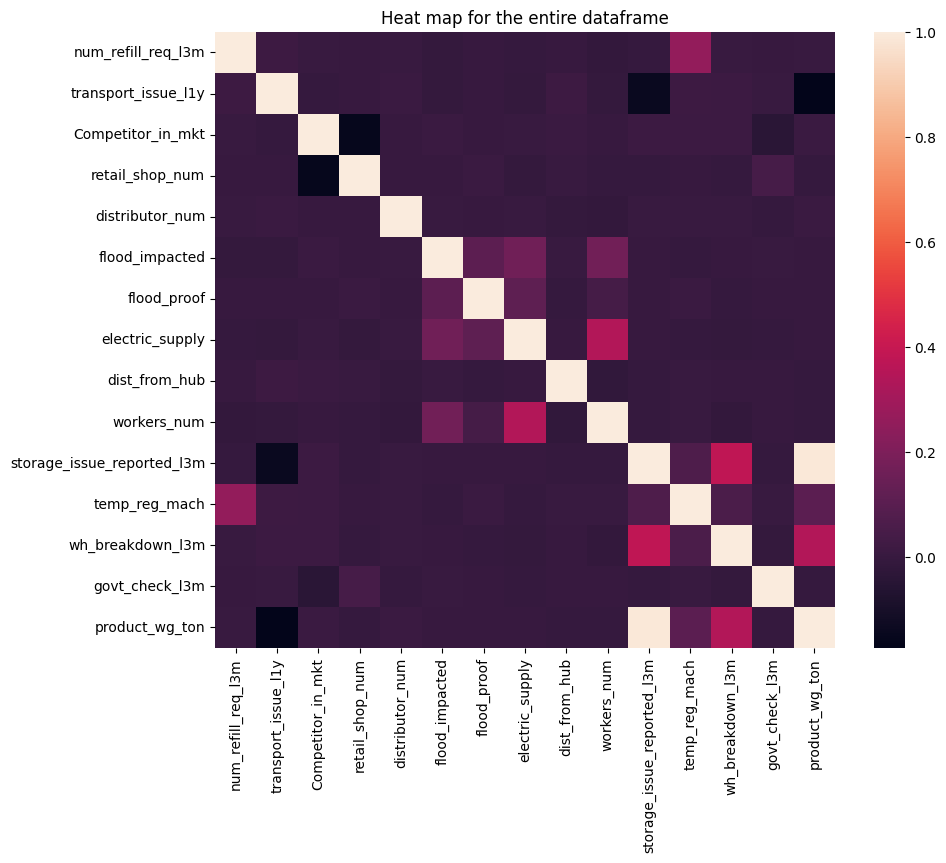

In [13]:
##
## heat map


plt.figure(figsize = (10, 8))
##sns.heatmap(noodles2.corr())
sns.heatmap(noodles2.select_dtypes(include=[np.number]).corr())
plt.title("Heat map for the entire dataframe")
plt.show()



## storage issue reported in the last three months seems to have absolute positive correlation with our target variable.
## this value alone could influence quite a bit to our target feature.

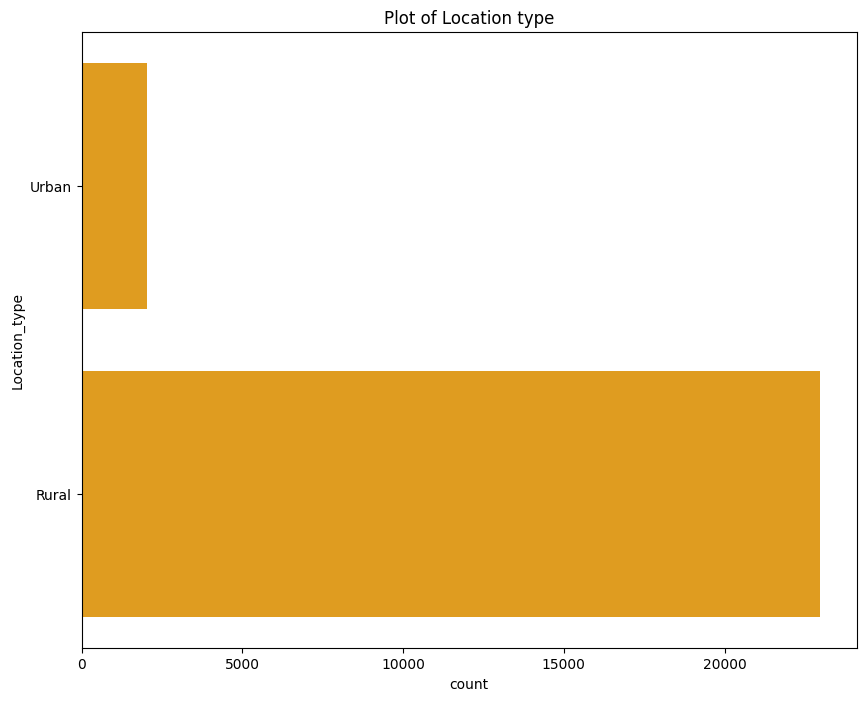

In [14]:
##
## plot of location type

plt.figure(figsize = (10, 8))
sns.countplot(data = noodles2['Location_type'], color = 'orange')
plt.title('Plot of Location type')
plt.show()


## based on loation type alone we do have an imbalance.

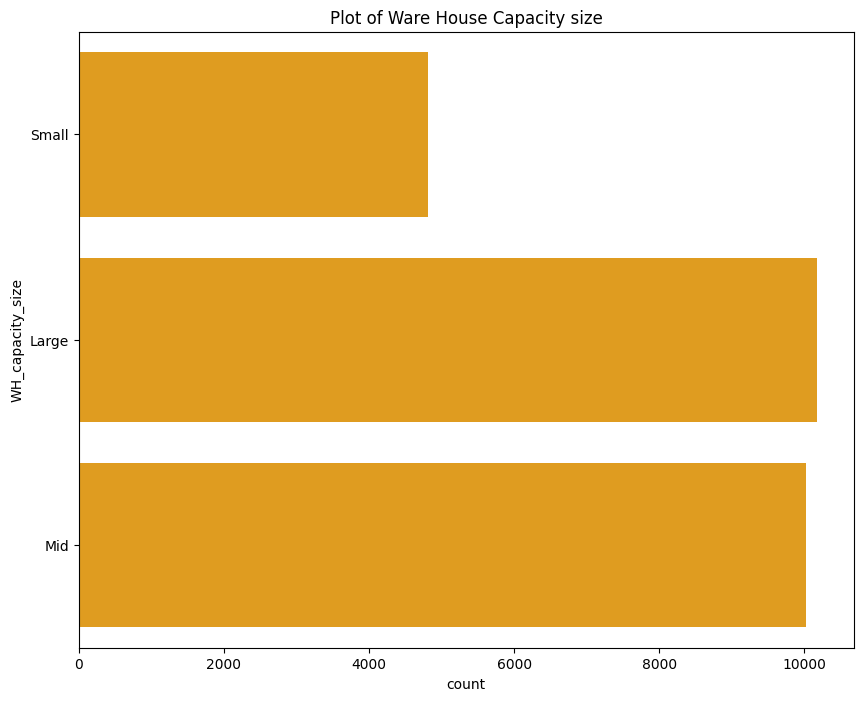

In [15]:
##
## plot of WH_capacity_size

plt.figure(figsize = (10, 8))
sns.countplot(data = noodles2['WH_capacity_size'], color = 'orange')
plt.title('Plot of Ware House Capacity size')
plt.show()


## based on ware house capacity, small is the only cateogry that is not on par with large and Mid *_*
## but the distribution is not too steep

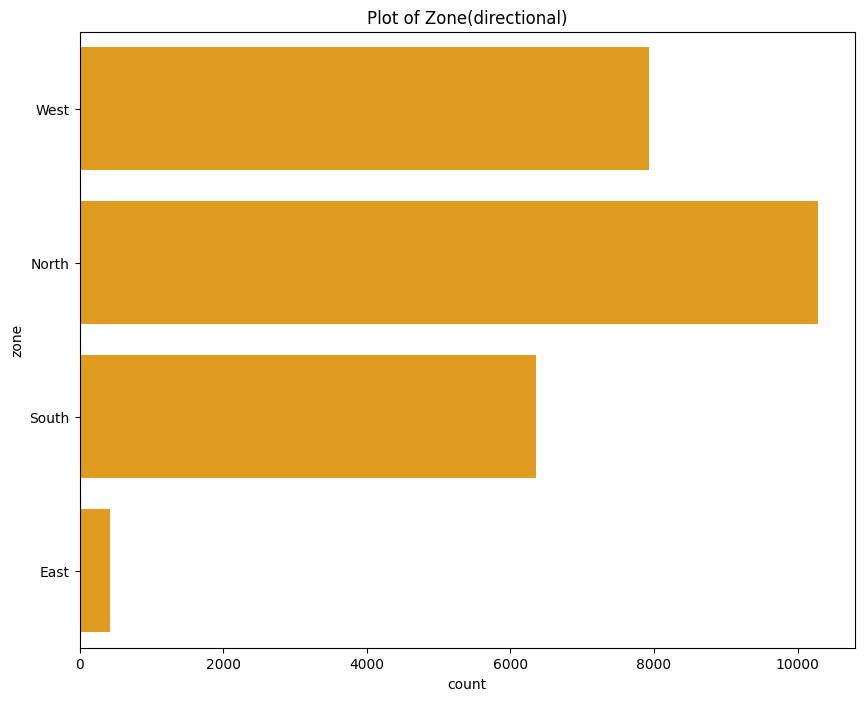

In [16]:
##
## plot of zone(directional)

plt.figure(figsize = (10, 8))
sns.countplot(data = noodles2['zone'], color = 'orange')
plt.title('Plot of Zone(directional)')
plt.show()


## East is the only zone to probably have less that 1000 instances of data *_*
## we might have to come up with ways to deal with this.

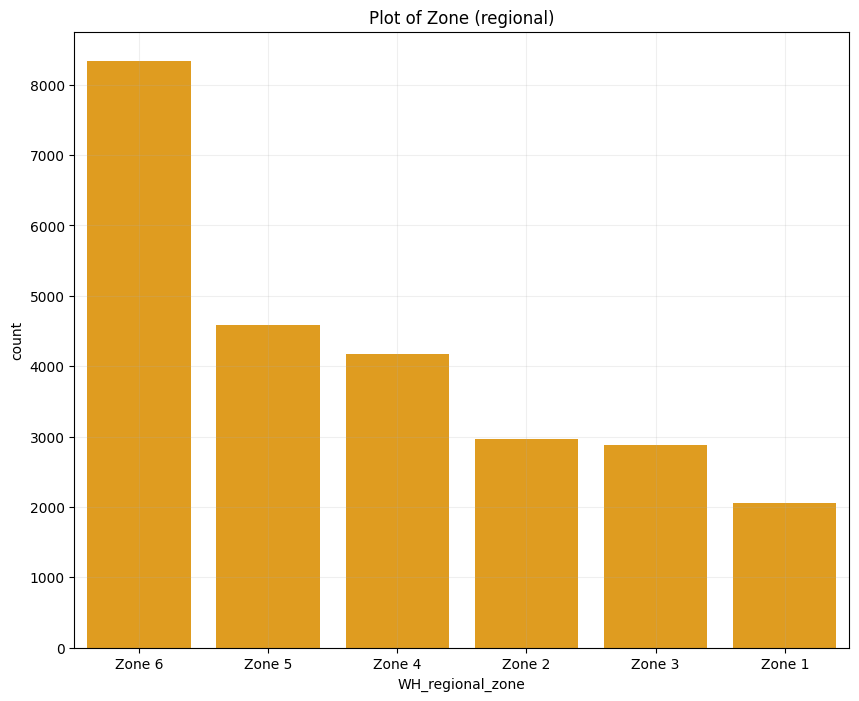

In [17]:
##
## plot of zone(regional)

plt.figure(figsize = (10, 8))
sns.barplot(data = noodles2['WH_regional_zone'].value_counts(), color = 'orange')
plt.title('Plot of Zone (regional)')
plt.grid(alpha = 0.2)
plt.show()


## The distribution seems to be following an order, greatest count is zone 6 all the way to 1
## the division is not balanced and we might have to see what can be dont about this.

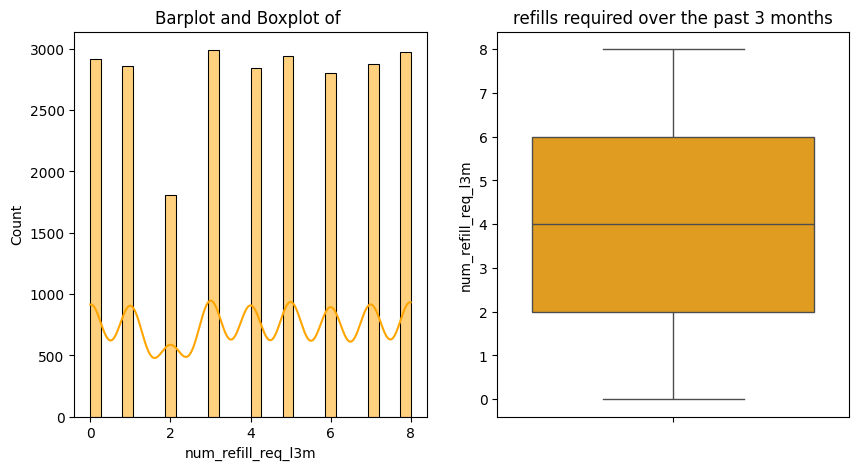

In [18]:
##
## plot of num_refill_req_l3m -- refils over 3 months

plt.figure(figsize = (10, 5))
plt.subplot(1, 2, 1)
sns.histplot(noodles2['num_refill_req_l3m'], color = 'orange', kde = True)
plt.title('Barplot and Boxplot of ')
plt.subplot(1, 2, 2)
sns.boxplot(y = noodles2['num_refill_req_l3m'], color = 'orange')
plt.title('refills required over the past 3 months')
plt.show()


## 2 seems to be least, while 3 and 8 are highest and close to each other
## 4 stands average

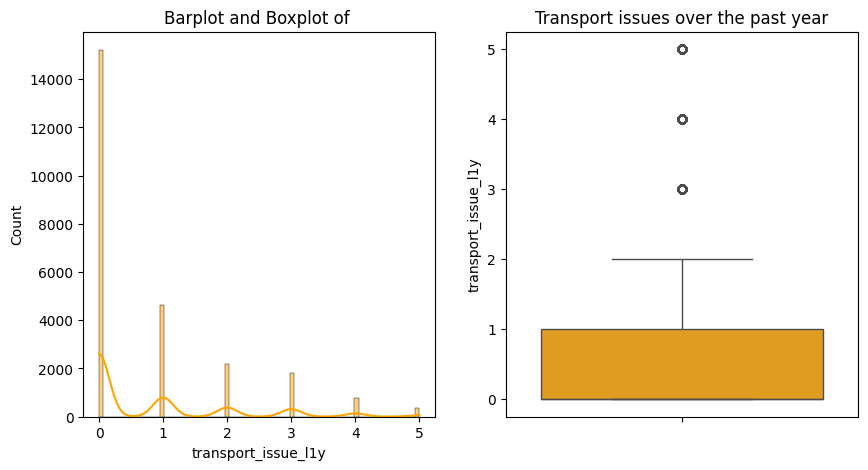

In [19]:
##
## plot of Transport issues over the past year

plt.figure(figsize = (10, 5))
plt.subplot(1, 2, 1)
sns.histplot(noodles2['transport_issue_l1y'], color = 'orange', kde = True)
plt.title('Barplot and Boxplot of ')
plt.subplot(1, 2, 2)
sns.boxplot(y = noodles2['transport_issue_l1y'], color = 'orange')
plt.title('Transport issues over the past year')
plt.show()

## surprisingly, 3, 4 and 5 seems to be outliers.
## the very small count has taken it to the ourliers zone.
## this also means that transport issues are less, which from a business perspective is good.

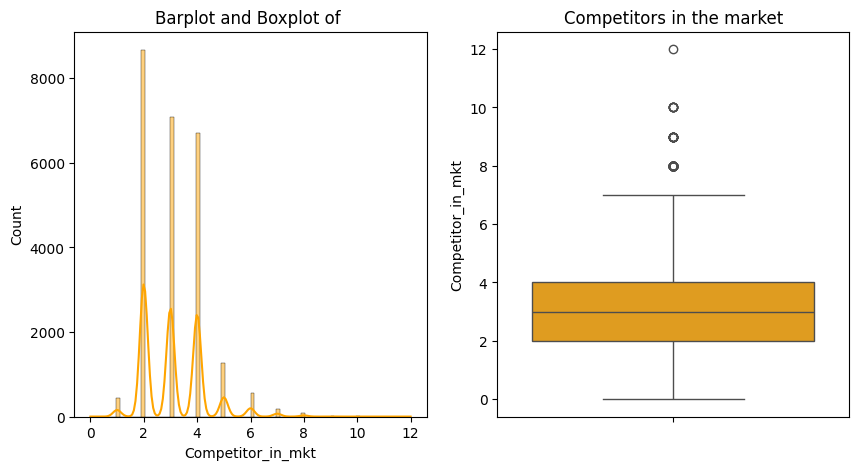

In [20]:
##
## plot of competitors in the market

plt.figure(figsize = (10, 5))
plt.subplot(1, 2, 1)
sns.histplot(noodles2['Competitor_in_mkt'], color = 'orange', kde = True)
plt.title('Barplot and Boxplot of ')
plt.subplot(1, 2, 2)
sns.boxplot(y = noodles2['Competitor_in_mkt'], color = 'orange')
plt.title('Competitors in the market')
plt.show()


## it really seems like having competitors of 8 or greater 8 is really a outlier scenario.
## 3 is the averge competiton.

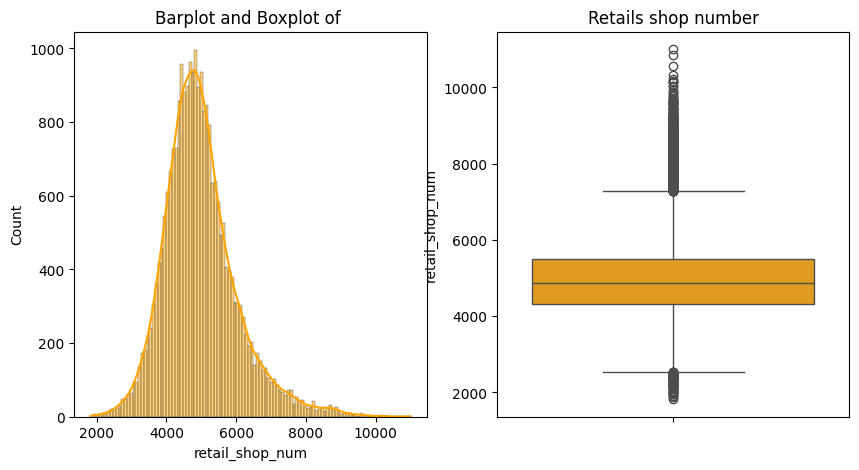

In [21]:
##
## plot of Shop numbers

plt.figure(figsize = (10, 5))
plt.subplot(1, 2, 1)
sns.histplot(noodles2['retail_shop_num'], color = 'orange', kde = True)
plt.title('Barplot and Boxplot of ')
plt.subplot(1, 2, 2)
sns.boxplot(y = noodles2['retail_shop_num'], color = 'orange')
plt.title('Retails shop number')
plt.show()

## We do have outliers in the feature, also the average is close to 5000 units.
## Outliers are present on both extremes and it seems like we can leave them as they are for now


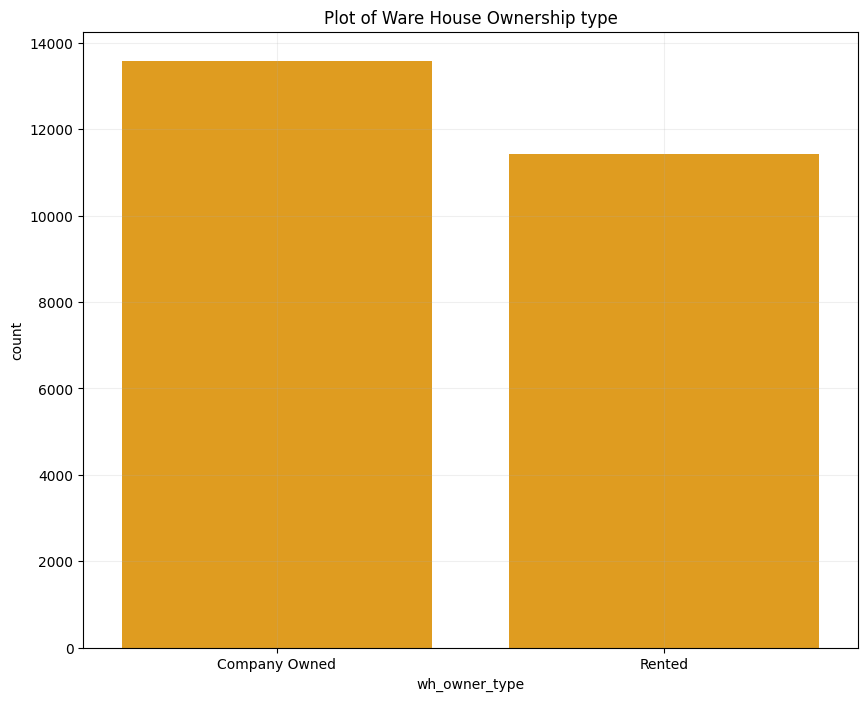

In [22]:
##
## plot of ware house onwnership type

plt.figure(figsize = (10, 8))
sns.barplot(data = noodles2['wh_owner_type'].value_counts(), color = 'orange')
plt.title('Plot of Ware House Ownership type')
plt.grid(alpha = 0.2)
plt.show()


## The distribution is not one-sided which is good going forward.

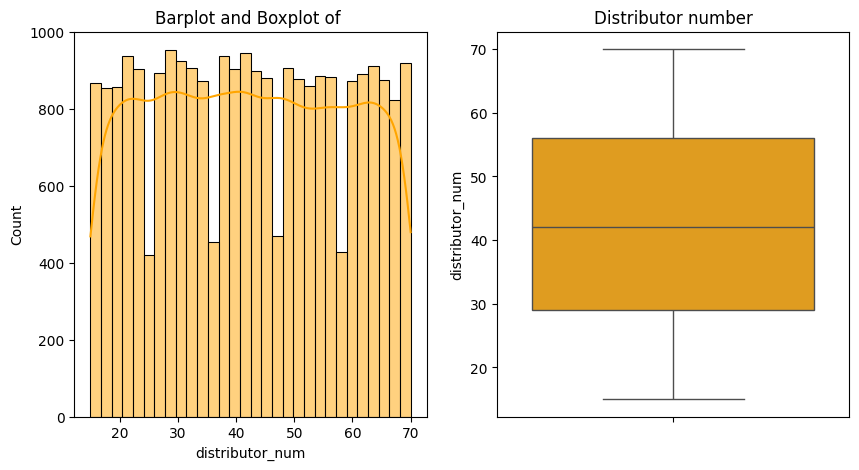

In [23]:
##
## plot of Shop numbers

plt.figure(figsize = (10, 5))
plt.subplot(1, 2, 1)
sns.histplot(noodles2['distributor_num'], color = 'orange', kde = True)
plt.title('Barplot and Boxplot of ')
plt.subplot(1, 2, 2)
sns.boxplot(y = noodles2['distributor_num'], color = 'orange')
plt.title('Distributor number')
plt.show()

## On avergae we have 43 to 44 distributors between the ratail and warehouses.
## there are not outliers which is good
## we do have some values that are less in count

Text(0.5, 1.0, 'Temperature Regulator')

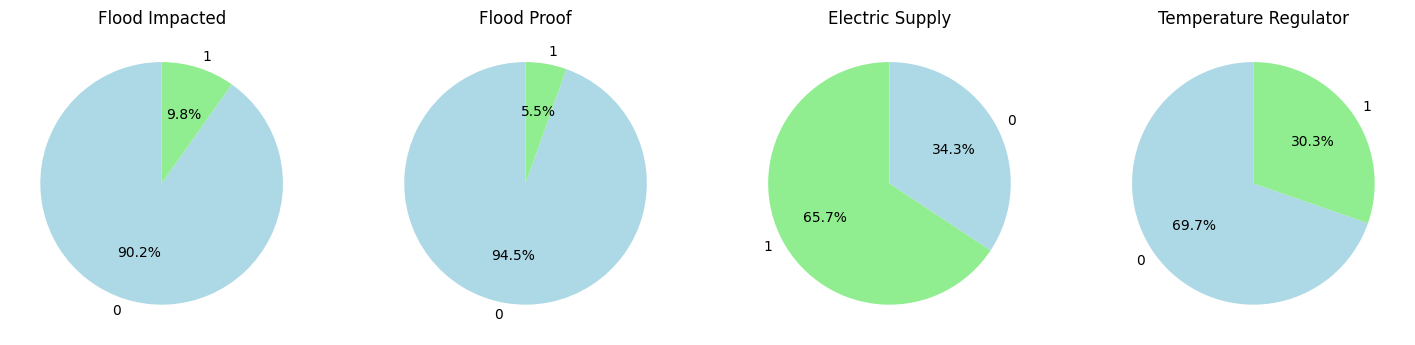

In [24]:
##
## pir charts for

fig, axes = plt.subplots(1, 4, figsize=(18, 6))

axes[0].pie(noodles1['flood_impacted'].value_counts(), labels=noodles1['flood_impacted'].value_counts().index, autopct='%1.1f%%',
            startangle=90, colors=['lightblue', 'lightgreen'])
axes[0].set_title('Flood Impacted')

axes[1].pie(noodles1['flood_proof'].value_counts(), labels=noodles1['flood_proof'].value_counts().index, autopct='%1.1f%%',
            startangle=90, colors=['lightblue', 'lightgreen'])
axes[1].set_title('Flood Proof')

axes[2].pie(noodles1['electric_supply'].value_counts(), labels=noodles1['electric_supply'].value_counts().index, autopct='%1.1f%%',
            startangle=90, colors=['lightgreen', 'lightblue'])
axes[2].set_title('Electric Supply')

axes[3].pie(noodles1['temp_reg_mach'].value_counts(), labels=noodles1['temp_reg_mach'].value_counts().index, autopct='%1.1f%%',
            startangle=90, colors=['lightblue', 'lightgreen'])
axes[3].set_title('Temperature Regulator')

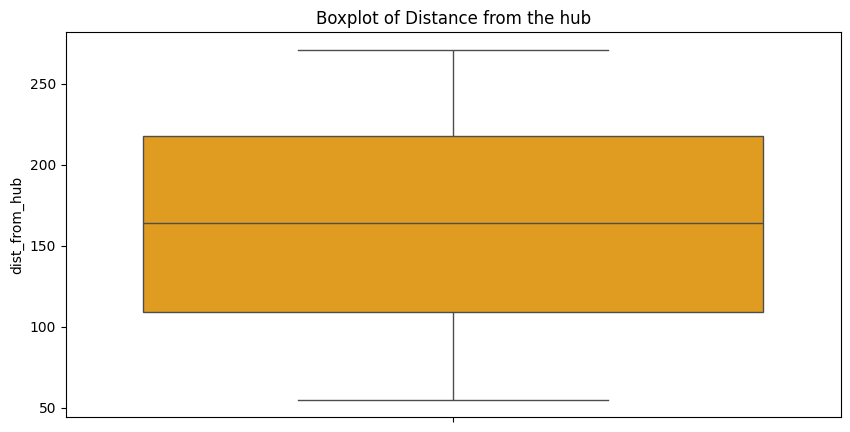

In [25]:
##
## plot of dist_from_hub


plt.figure(figsize = (10, 5))
sns.boxplot(y = noodles2['dist_from_hub'], color = 'orange')
plt.title('Boxplot of Distance from the hub')
plt.show()


## on average the distance is greater than 150
## we have to decide if we can bin this, maybe in groups of 25


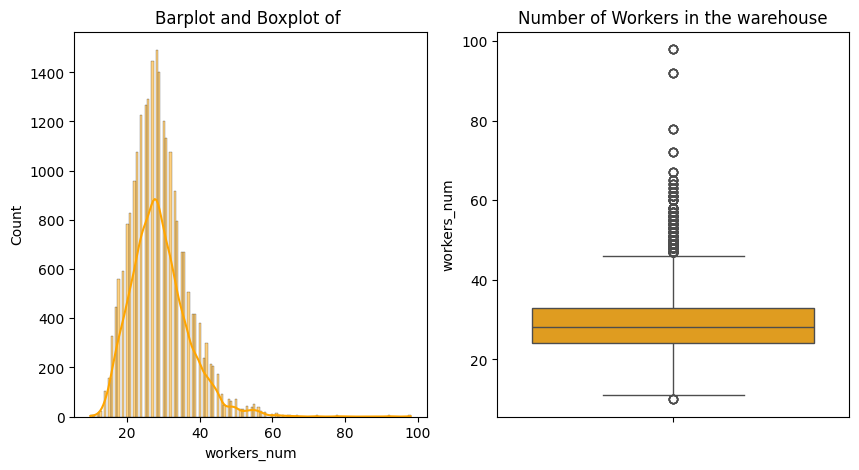

In [26]:
##
## plot of workers_num

plt.figure(figsize = (10, 5))
plt.subplot(1, 2, 1)
sns.histplot(noodles2['workers_num'], color = 'orange', kde = True)
plt.title('Barplot and Boxplot of ')
plt.subplot(1, 2, 2)
sns.boxplot(y = noodles2['workers_num'], color = 'orange')
plt.title('Number of Workers in the warehouse')
plt.show()


## number of workers is one of the features that has some missing values, less than 1000 *_*
## so the below is just an outline for refernce, once we decide the course of action we will again *_*
## plot and see the actual truth

## from the plots we can see on avergae 30 to 35 is the most frequent count, our avergae is also in sync.
## we do have some outliers like 100 workers, which is something that has to be worked upon and uncover the real value *_*
## it can also be a error while recording information.

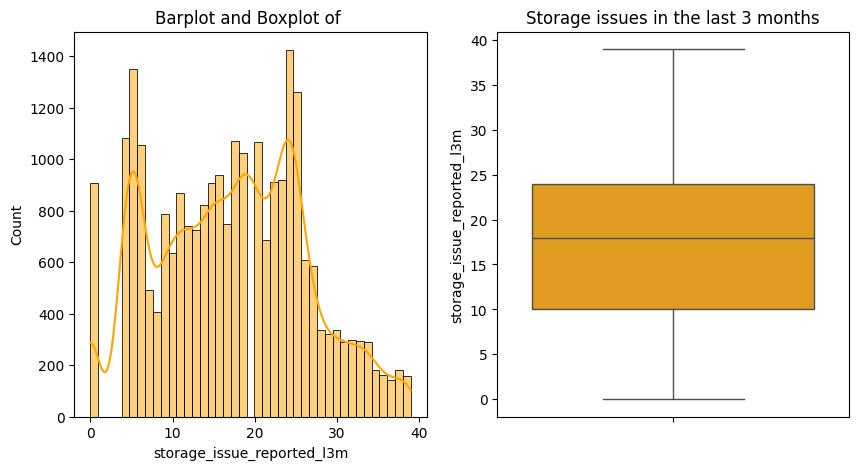

In [27]:
##
## plot of storage_issue_reported_l3m

plt.figure(figsize = (10, 5))
plt.subplot(1, 2, 1)
sns.histplot(noodles2['storage_issue_reported_l3m'], color = 'orange', kde = True)
plt.title('Barplot and Boxplot of ')
plt.subplot(1, 2, 2)
sns.boxplot(y = noodles2['storage_issue_reported_l3m'], color = 'orange')
plt.title('Storage issues in the last 3 months')
plt.show()


## the frequency is not evenly disctributed, it is quite random.
## being random is good in the sense that there might not have been repeating problems
## being random is bad because the warehouse is always prone to issues.
## seeing the fact that we have no outliers is not good, as that would mean our average is on the higher side.
## all of this is for the past 3 months alone, which is scary.

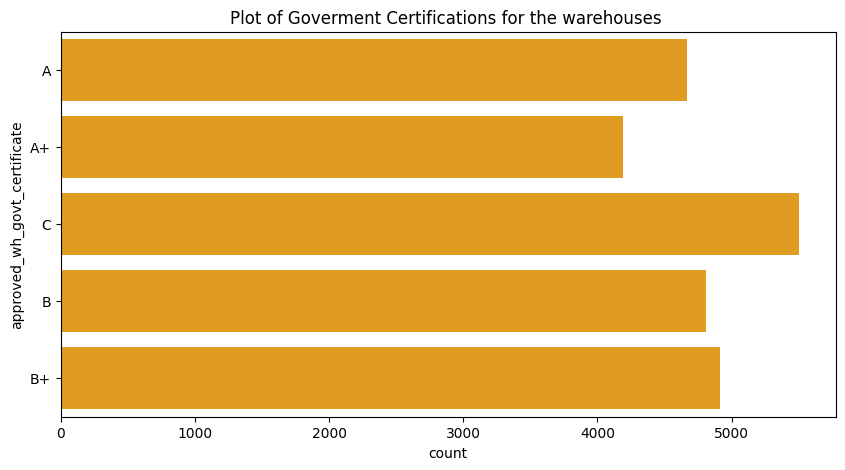

In [28]:
##
## plot of approved_wh_govt_certificate

plt.figure(figsize = (10, 5))
sns.countplot(noodles2['approved_wh_govt_certificate'], color = 'orange')
plt.title('Plot of Goverment Certifications for the warehouses ')
plt.show()



## this is another features that has null values, the total count is less than 1000, similar to another feature
## now we can remove all the row instances that have one missing value, even after removing all of them *_*
## at the worst case we would have still retained more than 90% of the dataset.


## from this alone the distributions is somewhat okay, not too steep or too flat.

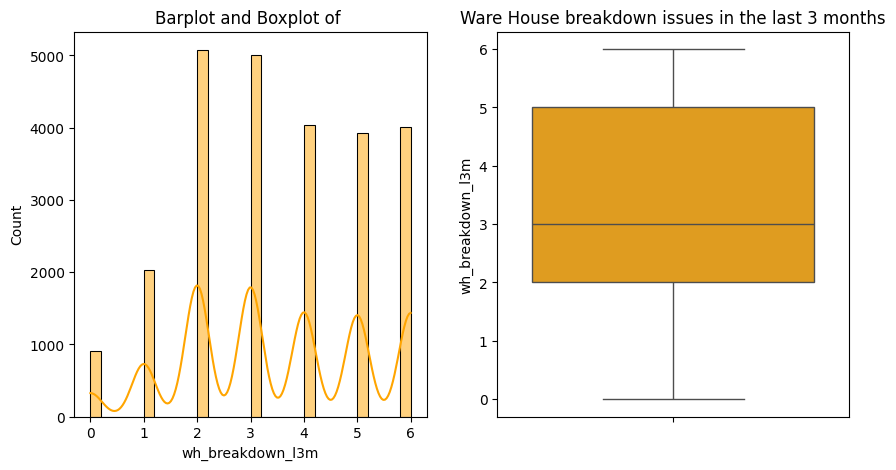

In [29]:
##
## plot of wh_breakdown_l3m

plt.figure(figsize = (10, 5))
plt.subplot(1, 2, 1)
sns.histplot(noodles2['wh_breakdown_l3m'], color = 'orange', kde = True)
plt.title('Barplot and Boxplot of ')
plt.subplot(1, 2, 2)
sns.boxplot(y = noodles2['wh_breakdown_l3m'], color = 'orange')
plt.title('Ware House breakdown issues in the last 3 months')
plt.show()


## Though the average is 3, the number of instances where it is greater than 3 is very higher
## the distribtion is not flat and skewed towards the left.

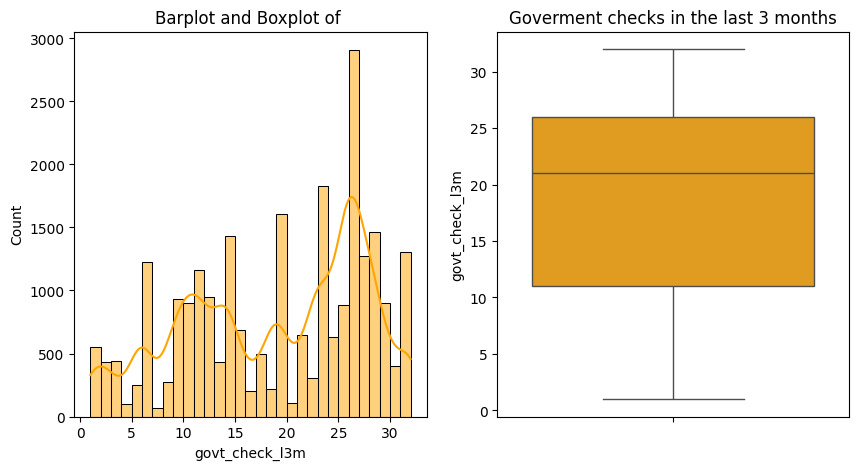

In [30]:
##
## plot of govt_check_l3m

plt.figure(figsize = (10, 5))
plt.subplot(1, 2, 1)
sns.histplot(noodles2['govt_check_l3m'], color = 'orange', kde = True)
plt.title('Barplot and Boxplot of ')
plt.subplot(1, 2, 2)
sns.boxplot(y = noodles2['govt_check_l3m'], color = 'orange')
plt.title('Goverment checks in the last 3 months')
plt.show()


## Goverment checks are on the higer side with an average of 21.
## 26 checks seem to be most and that has pulled the average way up
## the distribution is random, and this is good from a logical perspective *_*
## but also it seems like some are scrutenized deeper.

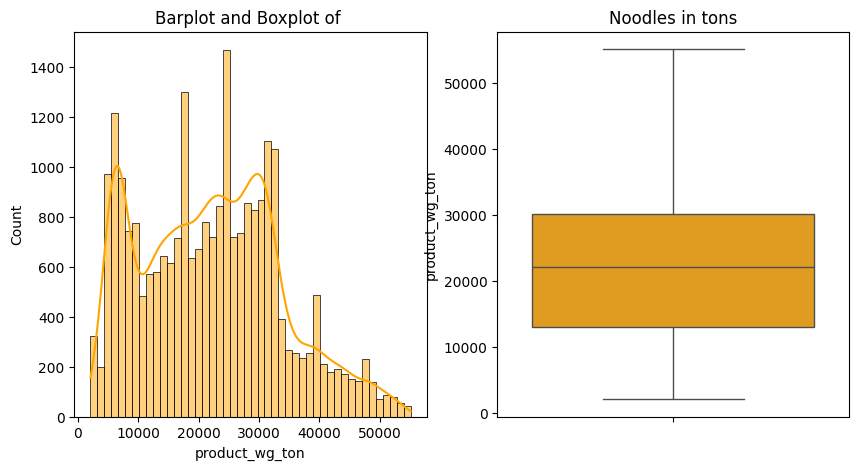

In [31]:
##
## plot of product_wg_ton

plt.figure(figsize = (10, 5))
plt.subplot(1, 2, 1)
sns.histplot(noodles2['product_wg_ton'], color = 'orange', kde = True)
plt.title('Barplot and Boxplot of ')
plt.subplot(1, 2, 2)
sns.boxplot(y = noodles2['product_wg_ton'], color = 'orange')
plt.title('Noodles in tons')
plt.show()


## THe distribution is not flat or balanced, it is skewed towards the right with some values being really scarping the ceiling.
## There are no outliers.
## the max weight shipped is greater than 5000 tons.


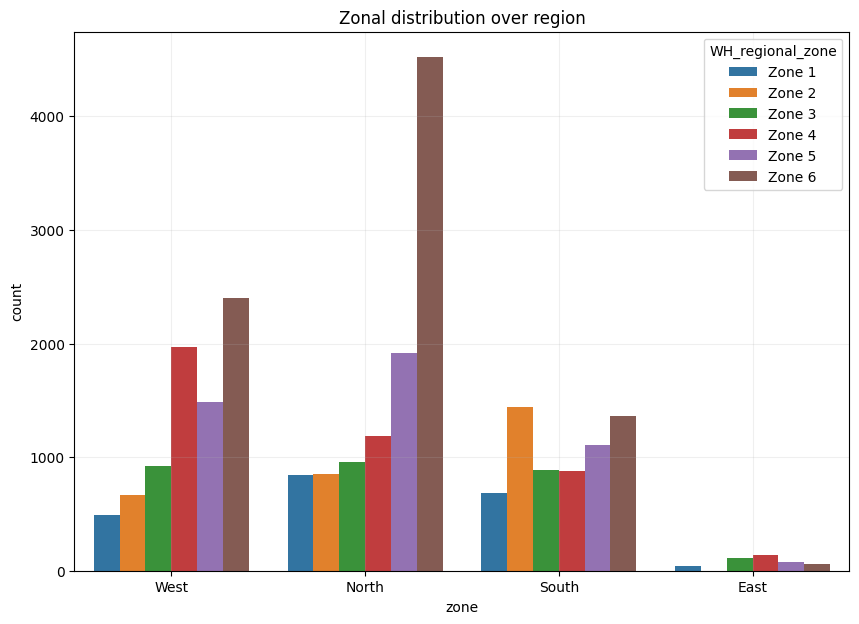

In [32]:
##
## lets see how zone is being handled.


zone_legend = np.sort(noodles2['WH_regional_zone'].unique())
plt.figure(figsize = (10, 7))
sns.countplot(data = noodles2, x = 'zone', hue = 'WH_regional_zone', hue_order = zone_legend)
plt.title('Zonal distribution over region')
plt.grid(alpha = 0.2)
plt.show()


## east seems to have the lowest count in all regional zones, moreover it seems to have very less or no zone 2
## North is the leading with the maximum number of units.

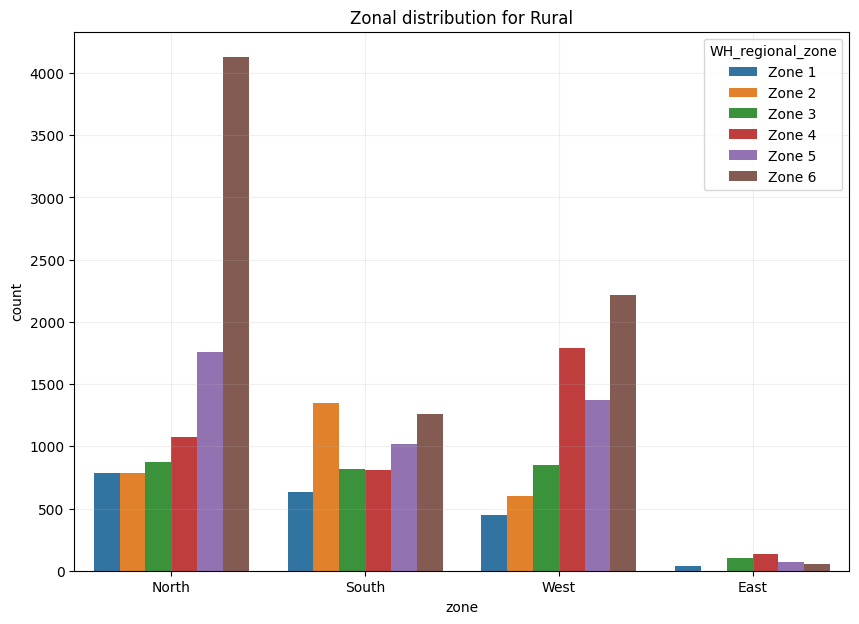

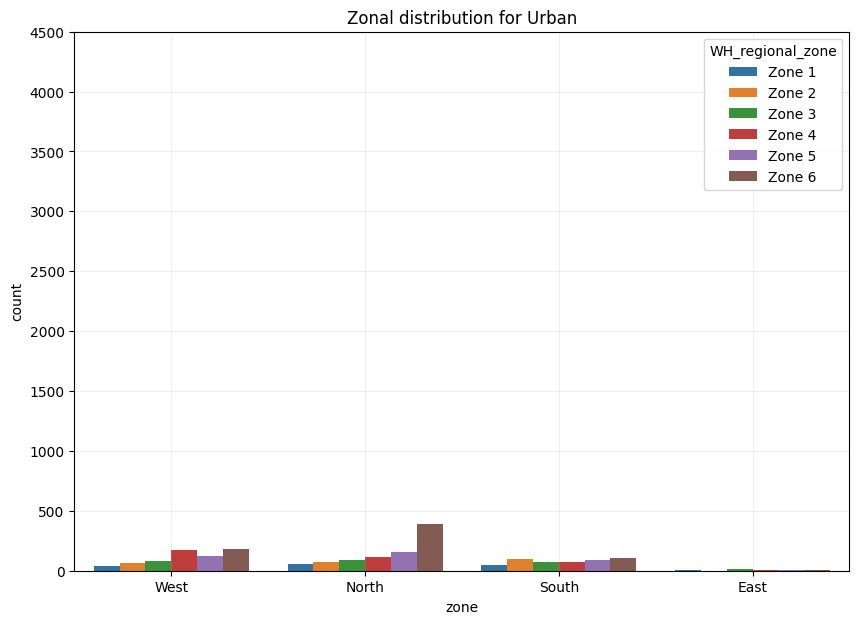

In [33]:
##
## Now lets apply location_type to both zones over the other features

location_type_rural = noodles2[noodles2['Location_type'] == 'Rural']
location_type_urban = noodles2[noodles2['Location_type'] == 'Urban']


zone_legend = np.sort(noodles2['WH_regional_zone'].unique())

## plot for rural
plt.figure(figsize = (10, 7))
sns.countplot(data = location_type_rural, x = 'zone', hue = 'WH_regional_zone', hue_order = zone_legend)
plt.title('Zonal distribution for Rural')
plt.grid(alpha = 0.2)
plt.show()


## plot for urban
plt.figure(figsize = (10, 7))
sns.countplot(data = location_type_urban, x = 'zone', hue = 'WH_regional_zone', hue_order = zone_legend)
plt.title('Zonal distribution for Urban')
plt.grid(alpha = 0.2)
plt.ylim((0, 4500))
plt.show()


## the imbalance as we saw before
## north zone dominates in both categories
## East is the lowest in both plots

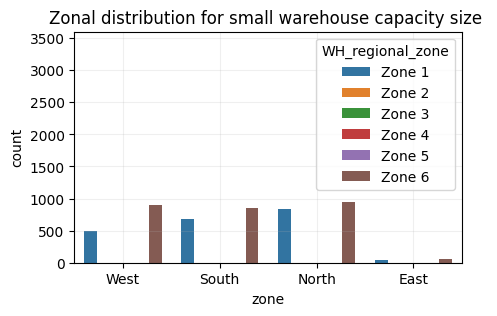

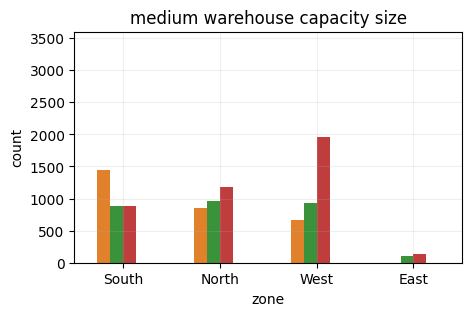

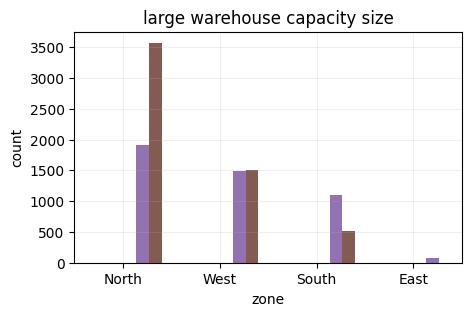

In [34]:
##
## Now lets apply capacity_size to both zones over the other features

WH_capacity_size_small = noodles2[noodles2['WH_capacity_size'] == 'Small']
WH_capacity_size_mid = noodles2[noodles2['WH_capacity_size'] == 'Mid']
WH_capacity_size_large = noodles2[noodles2['WH_capacity_size'] == 'Large']


zone_legend = np.sort(noodles2['WH_regional_zone'].unique())


## plot for small
plt.figure(figsize = (5, 3))
sns.countplot(data = WH_capacity_size_small, x = 'zone', hue = 'WH_regional_zone', hue_order = zone_legend)
plt.title('Zonal distribution for small warehouse capacity size ')
plt.grid(alpha = 0.2)
plt.ylim((0, 3600))
plt.show()


## plot for mid
plt.figure(figsize = (5, 3))
sns.countplot(data = WH_capacity_size_mid, x = 'zone', hue = 'WH_regional_zone', hue_order = zone_legend, legend = False)
plt.title('medium warehouse capacity size')
plt.grid(alpha = 0.2)
plt.ylim((0, 3600))
plt.show()


## plot for large
plt.figure(figsize = (5, 3))
sns.countplot(data = WH_capacity_size_large, x = 'zone', hue = 'WH_regional_zone', hue_order = zone_legend, legend = False)
plt.title('large warehouse capacity size')
plt.grid(alpha = 0.2)
plt.show()


## the disctibution is not normal, as we can see some of the zones do not even have any two of the three capacity sizes
## large warehouses are only focussed on zone 5 and 6 for any directional zone
## small capacity is only present in zones 1 and 6
## zones 2, 3, 4 are specifically for medium.

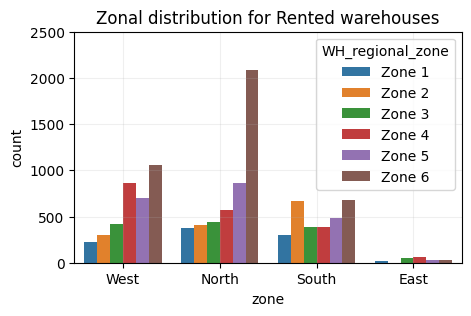

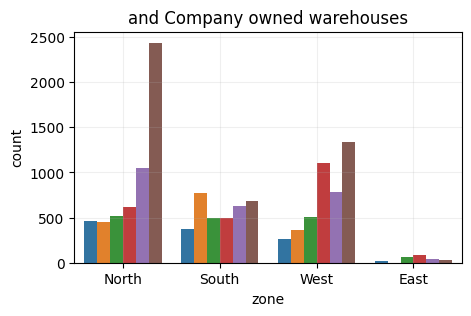

In [35]:
##
## Now lets apply wh_owner_type to zones

wh_owner_type_rented = noodles2[noodles2['wh_owner_type'] == 'Rented']
wh_owner_type_company_owned = noodles2[noodles2['wh_owner_type'] == 'Company Owned']

zone_legend = np.sort(noodles2['WH_regional_zone'].unique())


## plot for rented
plt.figure(figsize = (5, 3))
sns.countplot(data = wh_owner_type_rented, x = 'zone', hue = 'WH_regional_zone', hue_order = zone_legend)
plt.title('Zonal distribution for Rented warehouses')
plt.grid(alpha = 0.2)
plt.ylim((0, 2500))
plt.show()


## plot for company owner
plt.figure(figsize = (5, 3))
sns.countplot(data = wh_owner_type_company_owned, x = 'zone', hue = 'WH_regional_zone', hue_order = zone_legend, legend = False)
plt.title('and Company owned warehouses')
plt.grid(alpha = 0.2)
plt.show()

In [36]:
##
##

noodles2.info()

## reatail shop number is a feature that is not continuous, it is in a sense categorical but the count is *_*
## high that is mimcs a continous feature.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 21 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Location_type                 25000 non-null  object 
 1   WH_capacity_size              25000 non-null  object 
 2   zone                          25000 non-null  object 
 3   WH_regional_zone              25000 non-null  object 
 4   num_refill_req_l3m            25000 non-null  int64  
 5   transport_issue_l1y           25000 non-null  int64  
 6   Competitor_in_mkt             25000 non-null  int64  
 7   retail_shop_num               25000 non-null  int64  
 8   wh_owner_type                 25000 non-null  object 
 9   distributor_num               25000 non-null  int64  
 10  flood_impacted                25000 non-null  int64  
 11  flood_proof                   25000 non-null  int64  
 12  electric_supply               25000 non-null  int64  
 13  d

In [37]:
##
## lets see how we are going to handle the outliers


## outliers for this dataframe are very less, some of the features are numerical but still act like categories.
## moreover outliers face value and frequency are comparatively less, hence we can let them be.



In [38]:
##
## lets see what we are going to go about missing values

## There are some missing values in the features "workers_num" and "approved_wh_govt_certificate"
## lets see the total number of missing values in the dataframe(this is considering noodles2, which already has some of its features removed)

## calculating the count of rows with null values
rows_with_null = noodles2.isnull().any(axis=1).sum()

# Calculate the percentage of data lost by removing rows with nulls
total_cells = noodles2.count().sum()
data_loss_percentage = (rows_with_null / total_cells) * 100
print(data_loss_percentage)

## the total loss is around 0.36 percentage, this means we can remove those rows that hve null values.

0.356718192627824


In [39]:
##
## noodles3 dataframe without any null values

noodles3 = noodles2.dropna()
noodles3.head()

,Location_type,WH_capacity_size,zone,WH_regional_zone,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,retail_shop_num,wh_owner_type,distributor_num,...,flood_proof,electric_supply,dist_from_hub,workers_num,storage_issue_reported_l3m,temp_reg_mach,approved_wh_govt_certificate,wh_breakdown_l3m,govt_check_l3m,product_wg_ton
0,Urban,Small,West,Zone 6,3,1,2,4651,Rented,24,...,1,1,91,29.0,13,0,A,5,15,17115
1,Rural,Large,North,Zone 5,0,0,4,6217,Company Owned,47,...,0,1,210,31.0,4,0,A,3,17,5074
2,Rural,Mid,South,Zone 2,1,0,4,4306,Company Owned,64,...,0,0,161,37.0,17,0,A,6,22,23137
3,Rural,Mid,North,Zone 3,7,4,2,6000,Rented,50,...,0,0,103,21.0,17,1,A+,3,27,22115
4,Rural,Large,North,Zone 5,3,1,2,4740,Company Owned,42,...,0,1,112,25.0,18,0,C,6,24,24071


In [40]:
##
## resetting the index so that the dropna impact is corrected.

noodles3 = noodles3.reset_index(drop=True)
noodles3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23134 entries, 0 to 23133
Data columns (total 21 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Location_type                 23134 non-null  object 
 1   WH_capacity_size              23134 non-null  object 
 2   zone                          23134 non-null  object 
 3   WH_regional_zone              23134 non-null  object 
 4   num_refill_req_l3m            23134 non-null  int64  
 5   transport_issue_l1y           23134 non-null  int64  
 6   Competitor_in_mkt             23134 non-null  int64  
 7   retail_shop_num               23134 non-null  int64  
 8   wh_owner_type                 23134 non-null  object 
 9   distributor_num               23134 non-null  int64  
 10  flood_impacted                23134 non-null  int64  
 11  flood_proof                   23134 non-null  int64  
 12  electric_supply               23134 non-null  int64  
 13  d

In [41]:
##
## lets change some of the numerical features into object

"""

noodles3.loc[:, 'num_refill_req_l3m'] = noodles3['num_refill_req_l3m'].astype(object)
noodles3.loc[:, 'transport_issue_l1y'] = noodles3['transport_issue_l1y'].astype(object)
noodles3.loc[:, 'Competitor_in_mkt'] = noodles3['Competitor_in_mkt'].astype(object)
noodles3.loc[:, 'flood_impacted'] = noodles3['flood_impacted'].astype(object)
noodles3.loc[:, 'flood_proof'] = noodles3['flood_proof'].astype(object)
noodles3.loc[:, 'electric_supply'] = noodles3['electric_supply'].astype(object)
noodles3.loc[:, 'temp_reg_mach'] = noodles3['temp_reg_mach'].astype(object)
noodles3.loc[:, 'wh_breakdown_l3m'] = noodles3['wh_breakdown_l3m'].astype(object)

"""

"\n\nnoodles3.loc[:, 'num_refill_req_l3m'] = noodles3['num_refill_req_l3m'].astype(object)\nnoodles3.loc[:, 'transport_issue_l1y'] = noodles3['transport_issue_l1y'].astype(object)\nnoodles3.loc[:, 'Competitor_in_mkt'] = noodles3['Competitor_in_mkt'].astype(object)\nnoodles3.loc[:, 'flood_impacted'] = noodles3['flood_impacted'].astype(object)\nnoodles3.loc[:, 'flood_proof'] = noodles3['flood_proof'].astype(object)\nnoodles3.loc[:, 'electric_supply'] = noodles3['electric_supply'].astype(object)\nnoodles3.loc[:, 'temp_reg_mach'] = noodles3['temp_reg_mach'].astype(object)\nnoodles3.loc[:, 'wh_breakdown_l3m'] = noodles3['wh_breakdown_l3m'].astype(object)\n\n"

### Clustering

In [42]:
##
## first lets numericize categories



noodles4 = pd.get_dummies(noodles3, columns=['Location_type', 'wh_owner_type', 'WH_capacity_size', 'zone', 'WH_regional_zone'], drop_first = True)
noodles4.head()


,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,retail_shop_num,distributor_num,flood_impacted,flood_proof,electric_supply,dist_from_hub,workers_num,...,WH_capacity_size_Mid,WH_capacity_size_Small,zone_North,zone_South,zone_West,WH_regional_zone_Zone 2,WH_regional_zone_Zone 3,WH_regional_zone_Zone 4,WH_regional_zone_Zone 5,WH_regional_zone_Zone 6
0,3,1,2,4651,24,0,1,1,91,29.0,...,False,True,False,False,True,False,False,False,False,True
1,0,0,4,6217,47,0,0,1,210,31.0,...,False,False,True,False,False,False,False,False,True,False
2,1,0,4,4306,64,0,0,0,161,37.0,...,True,False,False,True,False,True,False,False,False,False
3,7,4,2,6000,50,0,0,0,103,21.0,...,True,False,True,False,False,False,True,False,False,False
4,3,1,2,4740,42,1,0,1,112,25.0,...,False,False,True,False,False,False,False,False,True,False


In [43]:
##
##  boolean conversion

for col in noodles4.columns:
    if noodles4[col].dtype == bool:
        noodles4[col] = noodles4[col].astype(int)


In [44]:
##
##

noodles4.head()

,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,retail_shop_num,distributor_num,flood_impacted,flood_proof,electric_supply,dist_from_hub,workers_num,...,WH_capacity_size_Mid,WH_capacity_size_Small,zone_North,zone_South,zone_West,WH_regional_zone_Zone 2,WH_regional_zone_Zone 3,WH_regional_zone_Zone 4,WH_regional_zone_Zone 5,WH_regional_zone_Zone 6
0,3,1,2,4651,24,0,1,1,91,29.0,...,0,1,0,0,1,0,0,0,0,1
1,0,0,4,6217,47,0,0,1,210,31.0,...,0,0,1,0,0,0,0,0,1,0
2,1,0,4,4306,64,0,0,0,161,37.0,...,1,0,0,1,0,1,0,0,0,0
3,7,4,2,6000,50,0,0,0,103,21.0,...,1,0,1,0,0,0,1,0,0,0
4,3,1,2,4740,42,1,0,1,112,25.0,...,0,0,1,0,0,0,0,0,1,0


In [45]:
##
## for goverment certificate

grade_order = {'C': 1, 'B': 2, 'B+': 3, 'A': 4, 'A+': 5}
noodles4['approved_wh_govt_certificate_encoded'] = noodles4['approved_wh_govt_certificate'].map(grade_order)
noodles4.drop('approved_wh_govt_certificate', inplace = True, axis = 1)
noodles4['approved_wh_govt_certificate_encoded'].head()

0    4
1    4
2    4
3    5
4    1
Name: approved_wh_govt_certificate_encoded, dtype: int64

In [46]:
##
##

noodles4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23134 entries, 0 to 23133
Data columns (total 28 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   num_refill_req_l3m                    23134 non-null  int64  
 1   transport_issue_l1y                   23134 non-null  int64  
 2   Competitor_in_mkt                     23134 non-null  int64  
 3   retail_shop_num                       23134 non-null  int64  
 4   distributor_num                       23134 non-null  int64  
 5   flood_impacted                        23134 non-null  int64  
 6   flood_proof                           23134 non-null  int64  
 7   electric_supply                       23134 non-null  int64  
 8   dist_from_hub                         23134 non-null  int64  
 9   workers_num                           23134 non-null  float64
 10  storage_issue_reported_l3m            23134 non-null  int64  
 11  temp_reg_mach  

In [47]:
##
## lets remove the target from noodles4


noodles4_target = noodles4['product_wg_ton'].copy()
noodles4.drop('product_wg_ton', axis = 1, inplace = True)
noodles4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23134 entries, 0 to 23133
Data columns (total 27 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   num_refill_req_l3m                    23134 non-null  int64  
 1   transport_issue_l1y                   23134 non-null  int64  
 2   Competitor_in_mkt                     23134 non-null  int64  
 3   retail_shop_num                       23134 non-null  int64  
 4   distributor_num                       23134 non-null  int64  
 5   flood_impacted                        23134 non-null  int64  
 6   flood_proof                           23134 non-null  int64  
 7   electric_supply                       23134 non-null  int64  
 8   dist_from_hub                         23134 non-null  int64  
 9   workers_num                           23134 non-null  float64
 10  storage_issue_reported_l3m            23134 non-null  int64  
 11  temp_reg_mach  

In [48]:
##
## scaling the og numerical features alone
## scaling the categorical features, the ones that have been encoded and now are numerical does not help us with interpretability *_*
## since they are already in the form of 0's and 1's.
## hence we will scale only the numerical features alone


noodles4_cat_encoded = noodles4[['Location_type_Urban', 'wh_owner_type_Rented', 'WH_capacity_size_Mid',
                                'WH_capacity_size_Small', 'zone_North', 'zone_South', 'zone_West',
                                'WH_regional_zone_Zone 2', 'WH_regional_zone_Zone 3', 'WH_regional_zone_Zone 4',
                                'WH_regional_zone_Zone 5', 'WH_regional_zone_Zone 6']].copy()
noodles4.drop(['Location_type_Urban', 'wh_owner_type_Rented', 'WH_capacity_size_Mid',
              'WH_capacity_size_Small', 'zone_North', 'zone_South', 'zone_West',
              'WH_regional_zone_Zone 2', 'WH_regional_zone_Zone 3', 'WH_regional_zone_Zone 4',
              'WH_regional_zone_Zone 5', 'WH_regional_zone_Zone 6'],
              axis = 1, inplace = True)
noodles4.info()




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23134 entries, 0 to 23133
Data columns (total 15 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   num_refill_req_l3m                    23134 non-null  int64  
 1   transport_issue_l1y                   23134 non-null  int64  
 2   Competitor_in_mkt                     23134 non-null  int64  
 3   retail_shop_num                       23134 non-null  int64  
 4   distributor_num                       23134 non-null  int64  
 5   flood_impacted                        23134 non-null  int64  
 6   flood_proof                           23134 non-null  int64  
 7   electric_supply                       23134 non-null  int64  
 8   dist_from_hub                         23134 non-null  int64  
 9   workers_num                           23134 non-null  float64
 10  storage_issue_reported_l3m            23134 non-null  int64  
 11  temp_reg_mach  

In [49]:
##
## now lets scale them, we are going to use standard scaler as that helps us in managing the outliers

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
noodles4_scaled = pd.DataFrame(scaler.fit_transform(noodles4))
noodles4_scaled.columns = noodles4.columns
noodles4_scaled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23134 entries, 0 to 23133
Data columns (total 15 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   num_refill_req_l3m                    23134 non-null  float64
 1   transport_issue_l1y                   23134 non-null  float64
 2   Competitor_in_mkt                     23134 non-null  float64
 3   retail_shop_num                       23134 non-null  float64
 4   distributor_num                       23134 non-null  float64
 5   flood_impacted                        23134 non-null  float64
 6   flood_proof                           23134 non-null  float64
 7   electric_supply                       23134 non-null  float64
 8   dist_from_hub                         23134 non-null  float64
 9   workers_num                           23134 non-null  float64
 10  storage_issue_reported_l3m            23134 non-null  float64
 11  temp_reg_mach  

In [50]:
noodles4_joined = pd.concat([noodles4_scaled, noodles4_cat_encoded[['Location_type_Urban', 'wh_owner_type_Rented', 'WH_capacity_size_Mid',
                                                                    'WH_capacity_size_Small', 'zone_North', 'zone_South', 'zone_West',
                                                                    'WH_regional_zone_Zone 2', 'WH_regional_zone_Zone 3', 'WH_regional_zone_Zone 4',
                                                                    'WH_regional_zone_Zone 5', 'WH_regional_zone_Zone 6']]], axis=1)

# Check for NaN values (optional)
print(noodles4_joined.isnull().sum())  # Check for total NaN values in each column

noodles4_joined.head()

num_refill_req_l3m                      0
transport_issue_l1y                     0
Competitor_in_mkt                       0
retail_shop_num                         0
distributor_num                         0
flood_impacted                          0
flood_proof                             0
electric_supply                         0
dist_from_hub                           0
workers_num                             0
storage_issue_reported_l3m              0
temp_reg_mach                           0
wh_breakdown_l3m                        0
govt_check_l3m                          0
approved_wh_govt_certificate_encoded    0
Location_type_Urban                     0
wh_owner_type_Rented                    0
WH_capacity_size_Mid                    0
WH_capacity_size_Small                  0
zone_North                              0
zone_South                              0
zone_West                               0
WH_regional_zone_Zone 2                 0
WH_regional_zone_Zone 3           

,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,retail_shop_num,distributor_num,flood_impacted,flood_proof,electric_supply,dist_from_hub,workers_num,...,WH_capacity_size_Mid,WH_capacity_size_Small,zone_North,zone_South,zone_West,WH_regional_zone_Zone 2,WH_regional_zone_Zone 3,WH_regional_zone_Zone 4,WH_regional_zone_Zone 5,WH_regional_zone_Zone 6
0,-0.417613,0.183346,-0.968895,-0.316887,-1.147701,-0.319435,4.356323,0.728307,-1.154816,0.007418,...,0,1,0,0,1,0,0,0,0,1
1,-1.568011,-0.647348,0.778069,1.169665,0.285291,-0.319435,-0.229551,0.728307,0.742091,0.261645,...,0,0,1,0,0,0,0,0,1,0
2,-1.184545,-0.647348,0.778069,-0.644384,1.344459,-0.319435,-0.229551,-1.373047,-0.038988,1.024325,...,1,0,0,1,0,1,0,0,0,0
3,1.116252,2.675426,-0.968895,0.963674,0.472203,-0.319435,-0.229551,-1.373047,-0.963531,-1.009489,...,1,0,1,0,0,0,1,0,0,0
4,-0.417613,0.183346,-0.968895,-0.232402,-0.026229,3.130525,-0.229551,0.728307,-0.820067,-0.501036,...,0,0,1,0,0,0,0,0,1,0


In [51]:
##
##

from sklearn.linear_model import LinearRegression

# Assuming X is your feature set and y is your continuous target variable

# Initialize and fit the linear regression model
model = LinearRegression()
model.fit(noodles4_joined, noodles4_target)

# Get the coefficients
coefficients = model.coef_

# Create a DataFrame of features and their coefficients
feature_importance = pd.DataFrame({'Feature': noodles4_joined.columns, 'Importance': coefficients})

# Display the features sorted by absolute importance
print(feature_importance.sort_values(by='Importance', key=abs, ascending=False))


## it seems we can take the first top most 10 important features
## we can leave out the rest


## the most important features are the first 10,


                                 Feature    Importance
10            storage_issue_reported_l3m  11164.398522
11                         temp_reg_mach    468.472400
14  approved_wh_govt_certificate_encoded    289.277190
1                    transport_issue_l1y   -278.970348
12                      wh_breakdown_l3m    -80.323107
0                     num_refill_req_l3m    -52.894275
15                   Location_type_Urban    -30.085864
4                        distributor_num     26.648821
18                WH_capacity_size_Small     26.191747
22               WH_regional_zone_Zone 2     23.337418
19                            zone_North     22.708239
6                            flood_proof     21.719857
21                             zone_West     14.045221
26               WH_regional_zone_Zone 6    -13.493907
25               WH_regional_zone_Zone 5     13.277611
20                            zone_South    -10.732333
17                  WH_capacity_size_Mid     10.540359
23        

In [52]:
##
##

import statsmodels.api as sm

# Assuming 'X' is your feature set and 'y' is your target variable
# Add a constant to the model (intercept)
noodles4_joined_with_const = sm.add_constant(noodles4_joined)

# Fit the model
model = sm.OLS(noodles4_target, noodles4_joined_with_const).fit()

# Print the summary of the model
print(model.summary())


## from the below chart we can see that only a few are really significant
## num_refill_req_l3m, transport_issue_l1y, distributor_num, flood_proof
## storage_issue_reported_l3m, temp_reg_mach, wh_breakdown_l3m,

                            OLS Regression Results                            
Dep. Variable:         product_wg_ton   R-squared:                       0.985
Model:                            OLS   Adj. R-squared:                  0.985
Method:                 Least Squares   F-statistic:                 5.781e+04
Date:                Mon, 08 Apr 2024   Prob (F-statistic):               0.00
Time:                        17:22:01   Log-Likelihood:            -2.0035e+05
No. Observations:               23134   AIC:                         4.008e+05
Df Residuals:                   23107   BIC:                         4.010e+05
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
                                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------


In [53]:
##
##

## the top important features from linear regressiona and *_*
## the most significant features from stats models OLS have the same features *_*
## this is good as we can cherry pick them alone and run the clustering
## the only thing is feature flood_proof is the only one that is at place 12


In [54]:
##
## train test split to see if we can run random forest classifier

from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(noodles4_joined, noodles4_target, test_size=0.75, random_state=42)



In [55]:
##
## Now we need to find the important features to help in clustering
## lets use feature importances from Random forest classifer

"""
from sklearn.ensemble import RandomForestClassifier


# Example using a target variable. For unsupervised, you might adapt by using features in turn as the target.
##clf = RandomForestClassifier()
clf = RandomForestClassifier(n_estimators=50, max_depth=10, random_state=42)
clf.fit(X_train, y_train)
importances = clf.feature_importances_
"""

## i tried to use random forest feature importances, but unfortunately my machine maxed out


'\nfrom sklearn.ensemble import RandomForestClassifier\n\n\n# Example using a target variable. For unsupervised, you might adapt by using features in turn as the target.\n##clf = RandomForestClassifier()\nclf = RandomForestClassifier(n_estimators=50, max_depth=10, random_state=42)\nclf.fit(X_train, y_train)\nimportances = clf.feature_importances_\n'

In [56]:
##
##


from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression



## Linear model
model = LinearRegression()

## Initialize RFE
rfe = RFE(estimator=model, n_features_to_select=10)

# Fit RFE
rfe.fit(noodles4_joined, noodles4_target)

# Selected features
print("Selected features:", rfe.support_)

# Feature ranking
print("Feature ranking:", rfe.ranking_)

selected_features = noodles4_joined.columns[rfe.support_]

## Now, transform your dataset to keep only the selected features
noodles4_joined_transformed = rfe.transform(noodles4_joined)

## Convert the array back to a DataFrame and set the column names
noodles4_joined_transformed = pd.DataFrame(noodles4_joined_transformed, columns=selected_features)



Selected features: [ True  True False False  True False False False False False  True  True
  True False  True  True False False False  True False False  True False
 False False False]
Feature ranking: [ 1  1 17  9  1 10  3 14 15 16  1  1  1 13  1  1 18  8  4  1  7  2  1 11
 12  6  5]


In [57]:
##
##

noodles4_joined_transformed.head()

,num_refill_req_l3m,transport_issue_l1y,distributor_num,storage_issue_reported_l3m,temp_reg_mach,wh_breakdown_l3m,approved_wh_govt_certificate_encoded,Location_type_Urban,zone_North,WH_regional_zone_Zone 2
0,-0.417613,0.183346,-1.147701,-0.550501,-0.676142,0.878922,0.790855,1.0,0.0,0.0
1,-1.568011,-0.647348,0.285291,-1.585340,-0.676142,-0.388997,0.790855,0.0,1.0,0.0
2,-1.184545,-0.647348,1.344459,-0.090573,-0.676142,1.512881,0.790855,0.0,0.0,1.0
3,1.116252,2.675426,0.472203,-0.090573,1.478979,-0.388997,1.499823,0.0,1.0,0.0
4,-0.417613,0.183346,-0.026229,0.024409,-0.676142,1.512881,-1.336050,0.0,1.0,0.0


In [58]:
##

selected_features = noodles4_joined.columns[rfe.support_]
selected_features


Index(['num_refill_req_l3m', 'transport_issue_l1y', 'distributor_num',
       'storage_issue_reported_l3m', 'temp_reg_mach', 'wh_breakdown_l3m',
       'approved_wh_govt_certificate_encoded', 'Location_type_Urban',
       'zone_North', 'WH_regional_zone_Zone 2'],
      dtype='object')

In [59]:
##
##

## so after doing the RFE part, we have come to the same 10 significant features, *_*
## the only odd one is the flood_proof again that is out of the top 10 but in the top 12
## I am going to include the top 12 so that i can accomodate flood_proof feature


In [60]:
##
##


noodles4_joined_transformed = pd.concat([noodles4_joined_transformed, noodles4_joined[['WH_capacity_size_Small', 'flood_proof']]], axis=1)
print(noodles4_joined_transformed.isnull().sum())
noodles4_joined_transformed.head()


num_refill_req_l3m                      0
transport_issue_l1y                     0
distributor_num                         0
storage_issue_reported_l3m              0
temp_reg_mach                           0
wh_breakdown_l3m                        0
approved_wh_govt_certificate_encoded    0
Location_type_Urban                     0
zone_North                              0
WH_regional_zone_Zone 2                 0
WH_capacity_size_Small                  0
flood_proof                             0
dtype: int64


,num_refill_req_l3m,transport_issue_l1y,distributor_num,storage_issue_reported_l3m,temp_reg_mach,wh_breakdown_l3m,approved_wh_govt_certificate_encoded,Location_type_Urban,zone_North,WH_regional_zone_Zone 2,WH_capacity_size_Small,flood_proof
0,-0.417613,0.183346,-1.147701,-0.550501,-0.676142,0.878922,0.790855,1.0,0.0,0.0,1,4.356323
1,-1.568011,-0.647348,0.285291,-1.585340,-0.676142,-0.388997,0.790855,0.0,1.0,0.0,0,-0.229551
2,-1.184545,-0.647348,1.344459,-0.090573,-0.676142,1.512881,0.790855,0.0,0.0,1.0,0,-0.229551
3,1.116252,2.675426,0.472203,-0.090573,1.478979,-0.388997,1.499823,0.0,1.0,0.0,0,-0.229551
4,-0.417613,0.183346,-0.026229,0.024409,-0.676142,1.512881,-1.336050,0.0,1.0,0.0,0,-0.229551


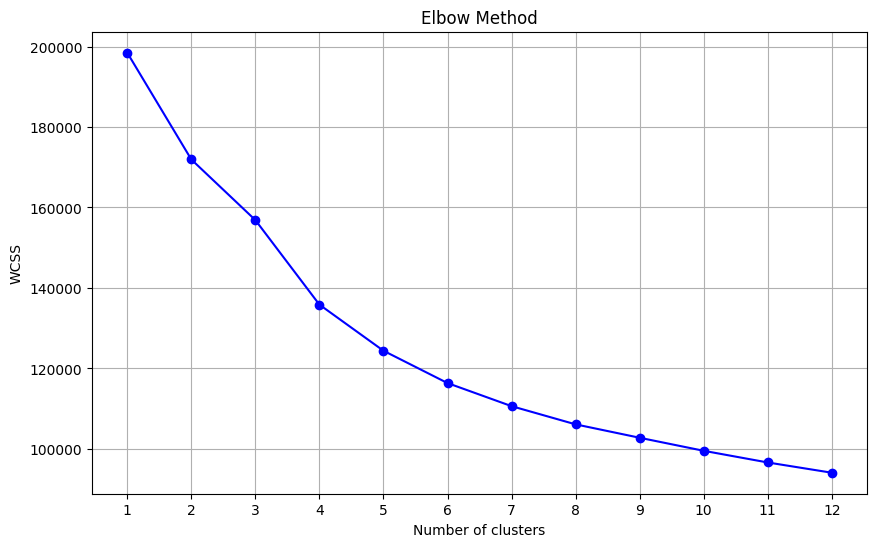

In [61]:
##
##

from sklearn.cluster import KMeans

wcss = []
for i in range(1, 13):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(noodles4_joined_transformed)
    wcss.append(kmeans.inertia_)


## Creating the elbow plot with points
plt.figure(figsize=(10, 6))
plt.plot(range(1, 13), wcss, '-o', color='blue')  ## '-o' adds line and circle markers
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.xticks(range(1, 13))
plt.grid(True)
plt.show()

In [62]:
##
## silhoutte score

from sklearn.metrics import silhouette_score


range_n_clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]  # Example range, adjust as necessary

for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = clusterer.fit_predict(noodles4_joined_transformed)
    silhouette_avg = silhouette_score(noodles4_joined_transformed, cluster_labels)
    print(f"For n_clusters = {n_clusters}, the average silhouette_score is : {silhouette_avg}")


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 2, the average silhouette_score is : 0.16254175041754026


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 3, the average silhouette_score is : 0.13138218171405128


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 4, the average silhouette_score is : 0.15134830842977331


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 5, the average silhouette_score is : 0.1547646943789314


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 6, the average silhouette_score is : 0.1452182560846973


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 7, the average silhouette_score is : 0.14962064575957673


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 8, the average silhouette_score is : 0.1417938152507113


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 9, the average silhouette_score is : 0.13615012427682094


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 10, the average silhouette_score is : 0.1409408286280235


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 11, the average silhouette_score is : 0.13912856575919988


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 12, the average silhouette_score is : 0.13192491172881696


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 13, the average silhouette_score is : 0.13839253300020837


In [63]:
##
##

kmeans = KMeans(n_clusters=2, init='k-means++', max_iter=300, n_init=10, random_state=42)
kmeans.fit(noodles4_joined_transformed)

# Getting the labels assigned to each instance
cluster_labels = kmeans.labels_


In [64]:
##
## lets remove 2 features from 12 to 10, these ten were orignally the most important featuers.


noodles4_joined_reduced = noodles4_joined_transformed.drop(['WH_capacity_size_Small', 'flood_proof'], axis=1)



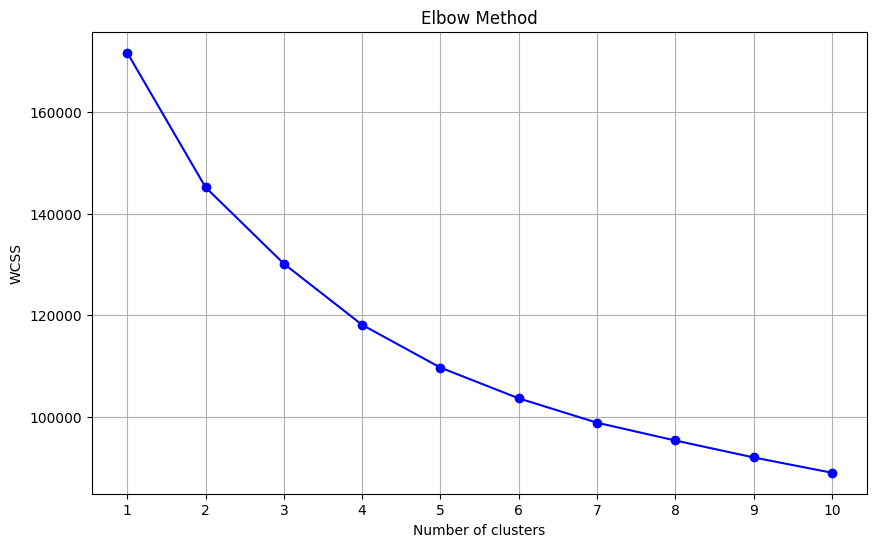

In [65]:
##
##

from sklearn.cluster import KMeans

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(noodles4_joined_reduced)
    wcss.append(kmeans.inertia_)


## Creating the elbow plot with points
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, '-o', color='blue')  ## '-o' adds line and circle markers
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.xticks(range(1, 11))
plt.grid(True)
plt.show()

In [66]:
##
## silhoutte score

from sklearn.metrics import silhouette_score


range_n_clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10]  # Example range, adjust as necessary

for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = clusterer.fit_predict(noodles4_joined_reduced)
    silhouette_avg = silhouette_score(noodles4_joined_reduced, cluster_labels)
    print(f"For n_clusters = {n_clusters}, the average silhouette_score is : {silhouette_avg}")






/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 2, the average silhouette_score is : 0.1785610512084981


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 3, the average silhouette_score is : 0.145534398276196


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 4, the average silhouette_score is : 0.14986173092627483


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 5, the average silhouette_score is : 0.14045978607115464


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 6, the average silhouette_score is : 0.14586903047567518


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 7, the average silhouette_score is : 0.13824485532657535


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 8, the average silhouette_score is : 0.1317667354449326


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 9, the average silhouette_score is : 0.13814169598929166


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 10, the average silhouette_score is : 0.13353126866140386


In [67]:
##
##

kmeans = KMeans(n_clusters=2, init='k-means++', max_iter=300, n_init=10, random_state=42)
kmeans.fit(noodles4_joined_reduced)

# Getting the labels assigned to each instance
cluster_labels = kmeans.labels_


In [68]:
##
##

from sklearn.metrics import calinski_harabasz_score

# Assume `X` is your data and `labels` are the cluster labels from your clustering algorithm
score = calinski_harabasz_score(noodles4_joined_reduced, kmeans.labels_)
print('Calinski-Harabasz Score:', score)


from sklearn.metrics import davies_bouldin_score

# Assuming `X` is your data and `labels` are the cluster labels from your clustering algorithm
score = davies_bouldin_score(noodles4_joined_reduced, kmeans.labels_)
print('Davies-Bouldin Score:', score)


Calinski-Harabasz Score: 4225.456106125025
Davies-Bouldin Score: 2.1223778866981236


In [69]:
##
## lets remove 3 features from 10 to 7


noodles4_joined_reduced = noodles4_joined_reduced.drop(['WH_regional_zone_Zone 2', 'zone_North', 'distributor_num'], axis=1)



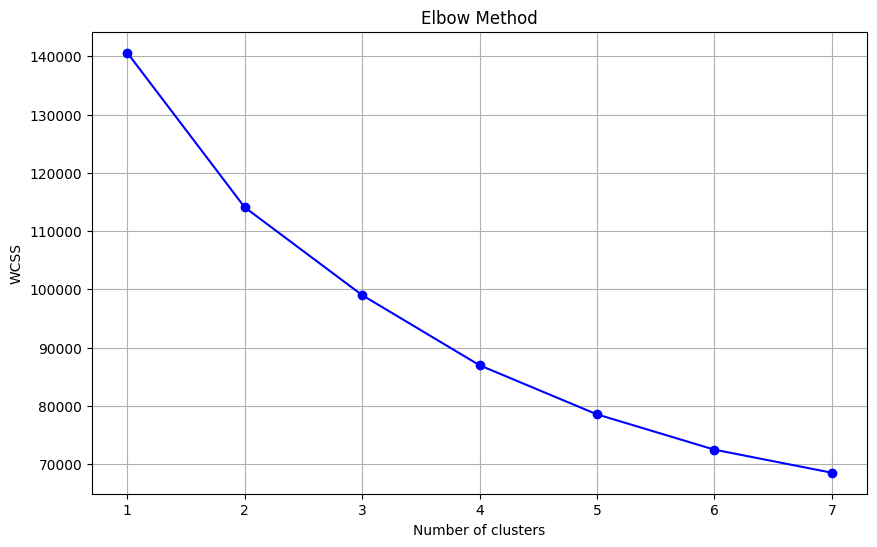

In [70]:
##
##

from sklearn.cluster import KMeans

wcss = []
for i in range(1, 8):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(noodles4_joined_reduced)
    wcss.append(kmeans.inertia_)


## Creating the elbow plot with points
plt.figure(figsize=(10, 6))
plt.plot(range(1, 8), wcss, '-o', color='blue')  ## '-o' adds line and circle markers
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.xticks(range(1, 8))
plt.grid(True)
plt.show()

In [71]:
##
## silhoutte score

from sklearn.metrics import silhouette_score


range_n_clusters = [2, 3, 4, 5, 6, 7]  # Example range, adjust as necessary

for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = clusterer.fit_predict(noodles4_joined_reduced)
    silhouette_avg = silhouette_score(noodles4_joined_reduced, cluster_labels)
    print(f"For n_clusters = {n_clusters}, the average silhouette_score is : {silhouette_avg}")

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 2, the average silhouette_score is : 0.21975550028051888


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 3, the average silhouette_score is : 0.18449712195436546


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 4, the average silhouette_score is : 0.19251140550105073


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 5, the average silhouette_score is : 0.18550131838918443


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 6, the average silhouette_score is : 0.1952729624909285


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 7, the average silhouette_score is : 0.18077509579713352


In [72]:
##
##

kmeans = KMeans(n_clusters=2, init='k-means++', max_iter=300, n_init=10, random_state=42)
kmeans.fit(noodles4_joined_reduced)

# Getting the labels assigned to each instance
cluster_labels = kmeans.labels_


In [73]:
##
##

from sklearn.metrics import calinski_harabasz_score

# Assume `X` is your data and `labels` are the cluster labels from your clustering algorithm
score = calinski_harabasz_score(noodles4_joined_reduced, kmeans.labels_)
print('Calinski-Harabasz Score:', score)


from sklearn.metrics import davies_bouldin_score

# Assuming `X` is your data and `labels` are the cluster labels from your clustering algorithm
score = davies_bouldin_score(noodles4_joined_reduced, kmeans.labels_)
print('Davies-Bouldin Score:', score)


Calinski-Harabasz Score: 5379.266506441025
Davies-Bouldin Score: 1.8635272831389667


In [74]:
##
## lets remove 2 more to make it 5


noodles4_joined_reduced = noodles4_joined_reduced.drop(['num_refill_req_l3m', 'Location_type_Urban'], axis=1)



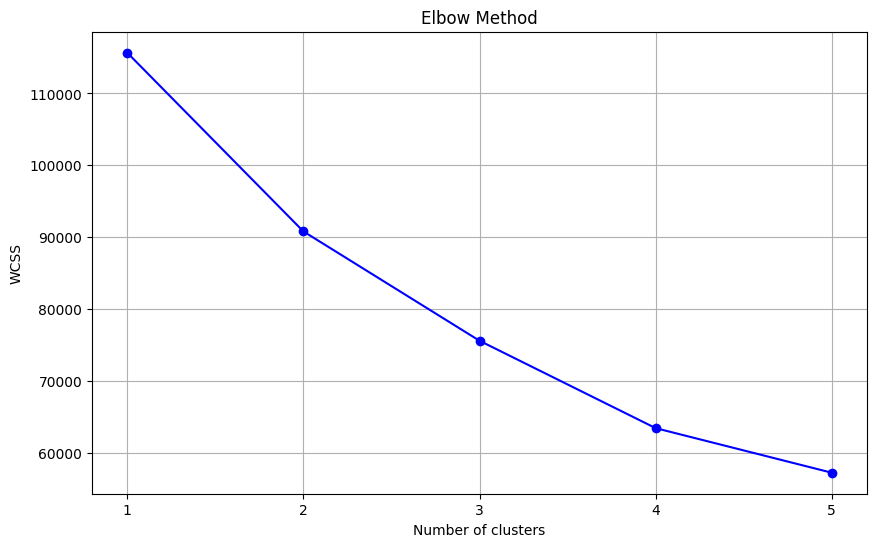

In [75]:
##
##

from sklearn.cluster import KMeans

wcss = []
for i in range(1, 6):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(noodles4_joined_reduced)
    wcss.append(kmeans.inertia_)


## Creating the elbow plot with points
plt.figure(figsize=(10, 6))
plt.plot(range(1, 6), wcss, '-o', color='blue')  ## '-o' adds line and circle markers
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.xticks(range(1, 6))
plt.grid(True)
plt.show()

In [76]:
##
## silhoutte score

from sklearn.metrics import silhouette_score


range_n_clusters = [2, 3, 4, 5]  # Example range, adjust as necessary

for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = clusterer.fit_predict(noodles4_joined_reduced)
    silhouette_avg = silhouette_score(noodles4_joined_reduced, cluster_labels)
    print(f"For n_clusters = {n_clusters}, the average silhouette_score is : {silhouette_avg}")

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 2, the average silhouette_score is : 0.26142348235507423


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 3, the average silhouette_score is : 0.22586151579466837


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 4, the average silhouette_score is : 0.24049826379953382


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 5, the average silhouette_score is : 0.24617976166223246


In [77]:
##
##

kmeans = KMeans(n_clusters=2, init='k-means++', max_iter=300, n_init=10, random_state=42)
kmeans.fit(noodles4_joined_reduced)

# Getting the labels assigned to each instance
cluster_labels = kmeans.labels_


In [78]:
##
##

from sklearn.metrics import calinski_harabasz_score

# Assume `X` is your data and `labels` are the cluster labels from your clustering algorithm
score = calinski_harabasz_score(noodles4_joined_reduced, kmeans.labels_)
print('Calinski-Harabasz Score:', score)


from sklearn.metrics import davies_bouldin_score

# Assuming `X` is your data and `labels` are the cluster labels from your clustering algorithm
score = davies_bouldin_score(noodles4_joined_reduced, kmeans.labels_)
print('Davies-Bouldin Score:', score)


Calinski-Harabasz Score: 6338.237534382235
Davies-Bouldin Score: 1.7149779219743078


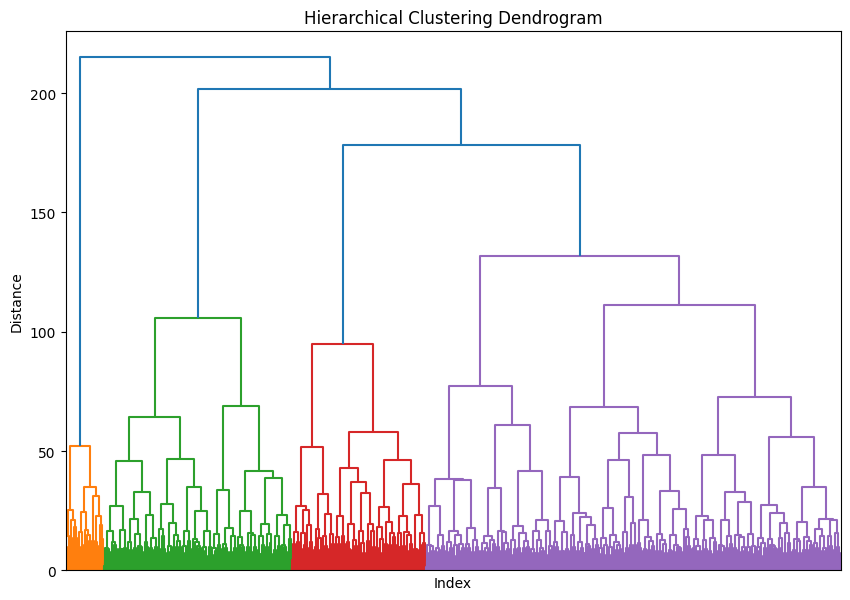

In [79]:
##
## Now lets try hierarchical clustering



from scipy.cluster.hierarchy import dendrogram, linkage

## Generate the linkage matrix
Z = linkage(noodles4_joined_transformed, 'ward')

# Plot dendrogram
plt.figure(figsize=(10, 7))
dendrogram(Z, no_labels=True)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Index')
plt.ylabel('Distance')
plt.show()


In [80]:
##
##

from sklearn.cluster import AgglomerativeClustering

num_clusters = 4
cluster = AgglomerativeClustering(n_clusters=num_clusters, affinity='euclidean', linkage='ward')
cluster.fit_predict(noodles4_joined_transformed)

# To get the silhouette score for the number of clusters determined
silhouette_avg = silhouette_score(noodles4_joined_transformed, cluster.labels_)
print('The average silhouette_score for {} clusters is: {}'.format(num_clusters, silhouette_avg))



/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


The average silhouette_score for 4 clusters is: 0.1643696456796706


In [81]:
##
##

from sklearn.metrics import calinski_harabasz_score

# Assume `X` is your data and `labels` are the cluster labels from your clustering algorithm
score = calinski_harabasz_score(noodles4_joined_transformed, cluster.labels_)
print('Calinski-Harabasz Score:', score)


from sklearn.metrics import davies_bouldin_score

# Assuming `X` is your data and `labels` are the cluster labels from your clustering algorithm
score = davies_bouldin_score(noodles4_joined_transformed, cluster.labels_)
print('Davies-Bouldin Score:', score)


Calinski-Harabasz Score: 3289.753088969232
Davies-Bouldin Score: 1.8517440236322609


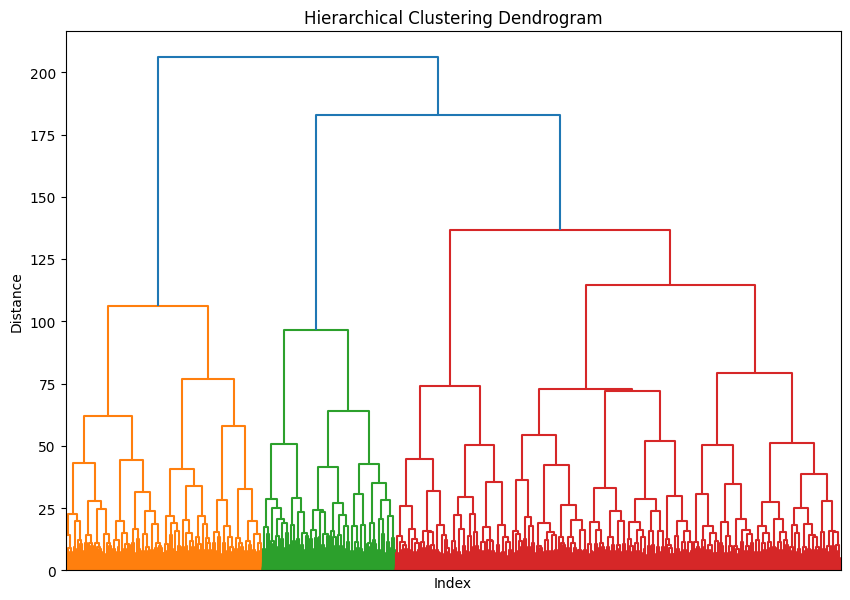

In [82]:
##
## Now lets try hierarchical clustering round 2



noodles4_joined_reduced = noodles4_joined_transformed.drop(['WH_capacity_size_Small', 'flood_proof'], axis=1)

## Generate the linkage matrix
Z = linkage(noodles4_joined_reduced, 'ward')

# Plot dendrogram
plt.figure(figsize=(10, 7))
dendrogram(Z, no_labels=True)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Index')
plt.ylabel('Distance')
plt.show()

In [83]:
##
##



num_clusters = 3
cluster = AgglomerativeClustering(n_clusters=num_clusters, affinity='euclidean', linkage='ward')
cluster.fit_predict(noodles4_joined_reduced)

# To get the silhouette score for the number of clusters determined
silhouette_avg = silhouette_score(noodles4_joined_reduced, cluster.labels_)
print('The average silhouette_score for {} clusters is: {}'.format(num_clusters, silhouette_avg))


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


The average silhouette_score for 3 clusters is: 0.1606521371638387


In [84]:
##
##

from sklearn.metrics import calinski_harabasz_score

# Assume `X` is your data and `labels` are the cluster labels from your clustering algorithm
score = calinski_harabasz_score(noodles4_joined_transformed, cluster.labels_)
print('Calinski-Harabasz Score:', score)


from sklearn.metrics import davies_bouldin_score

# Assuming `X` is your data and `labels` are the cluster labels from your clustering algorithm
score = davies_bouldin_score(noodles4_joined_transformed, cluster.labels_)
print('Davies-Bouldin Score:', score)


Calinski-Harabasz Score: 2735.514152892326
Davies-Bouldin Score: 2.2044597170531994


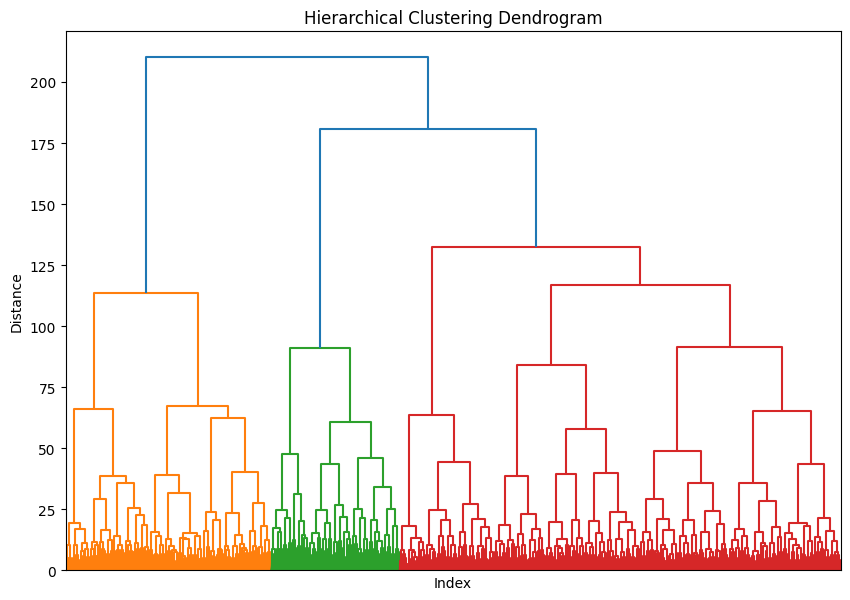

In [85]:
##
## Now lets try hierarchical clustering round 3



noodles4_joined_reduced = noodles4_joined_reduced.drop(['WH_regional_zone_Zone 2', 'zone_North', 'distributor_num'], axis=1)

## Generate the linkage matrix
Z = linkage(noodles4_joined_reduced, 'ward')

# Plot dendrogram
plt.figure(figsize=(10, 7))
dendrogram(Z, no_labels=True)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Index')
plt.ylabel('Distance')
plt.show()

In [86]:
##
##



num_clusters = 3
cluster = AgglomerativeClustering(n_clusters=num_clusters, affinity='euclidean', linkage='ward')
cluster.fit_predict(noodles4_joined_reduced)

# To get the silhouette score for the number of clusters determined
silhouette_avg = silhouette_score(noodles4_joined_reduced, cluster.labels_)
print('The average silhouette_score for {} clusters is: {}'.format(num_clusters, silhouette_avg))


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


The average silhouette_score for 3 clusters is: 0.20434252660323807


In [87]:
##
##

from sklearn.metrics import calinski_harabasz_score

# Assume `X` is your data and `labels` are the cluster labels from your clustering algorithm
score = calinski_harabasz_score(noodles4_joined_transformed, cluster.labels_)
print('Calinski-Harabasz Score:', score)


from sklearn.metrics import davies_bouldin_score

# Assuming `X` is your data and `labels` are the cluster labels from your clustering algorithm
score = davies_bouldin_score(noodles4_joined_transformed, cluster.labels_)
print('Davies-Bouldin Score:', score)


Calinski-Harabasz Score: 2780.8287670878117
Davies-Bouldin Score: 2.1891875064835373


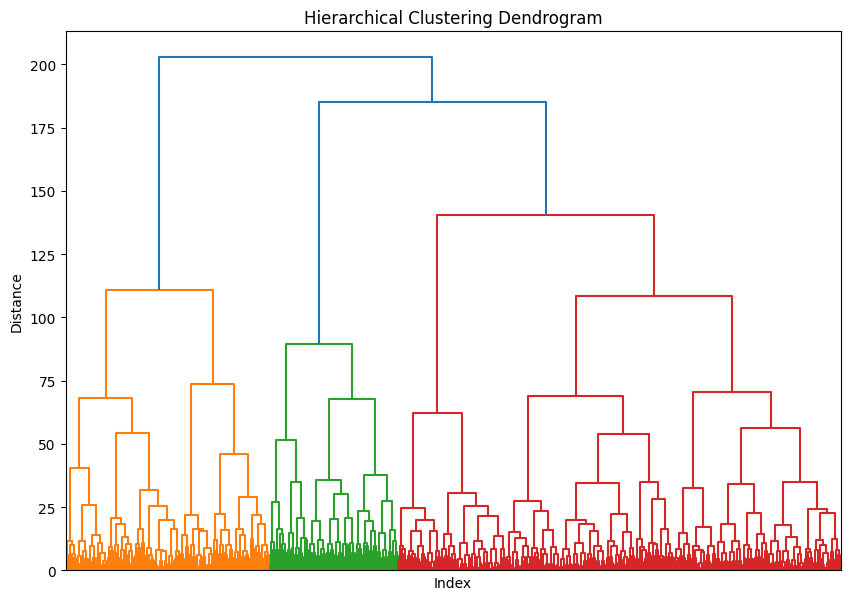

In [88]:
##
## Now lets try hierarchical clustering round 4



noodles4_joined_reduced = noodles4_joined_reduced.drop(['num_refill_req_l3m', 'Location_type_Urban'], axis=1)

## Generate the linkage matrix
Z = linkage(noodles4_joined_reduced, 'ward')

# Plot dendrogram
plt.figure(figsize=(10, 7))
dendrogram(Z, no_labels=True)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Index')
plt.ylabel('Distance')
plt.show()

In [89]:
##
##



num_clusters = 3
cluster = AgglomerativeClustering(n_clusters=num_clusters, affinity='euclidean', linkage='ward')
cluster.fit_predict(noodles4_joined_reduced)

## To get the silhouette score for the number of clusters determined
silhouette_avg = silhouette_score(noodles4_joined_reduced, cluster.labels_)
print('The average silhouette_score for {} clusters is: {}'.format(num_clusters, silhouette_avg))


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


The average silhouette_score for 3 clusters is: 0.25365546929613375


In [90]:
##
##

from sklearn.metrics import calinski_harabasz_score

# Assume `X` is your data and `labels` are the cluster labels from your clustering algorithm
score = calinski_harabasz_score(noodles4_joined_reduced, cluster.labels_)
print('Calinski-Harabasz Score:', score)


from sklearn.metrics import davies_bouldin_score

# Assuming `X` is your data and `labels` are the cluster labels from your clustering algorithm
score = davies_bouldin_score(noodles4_joined_reduced, cluster.labels_)
print('Davies-Bouldin Score:', score)


Calinski-Harabasz Score: 5593.747367783379
Davies-Bouldin Score: 1.5438665530907263


In [91]:
##
##

noodles4_hier_cluster = noodles4.copy()
noodles4_hier_cluster.head()

,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,retail_shop_num,distributor_num,flood_impacted,flood_proof,electric_supply,dist_from_hub,workers_num,storage_issue_reported_l3m,temp_reg_mach,wh_breakdown_l3m,govt_check_l3m,approved_wh_govt_certificate_encoded
0,3,1,2,4651,24,0,1,1,91,29.0,13,0,5,15,4
1,0,0,4,6217,47,0,0,1,210,31.0,4,0,3,17,4
2,1,0,4,4306,64,0,0,0,161,37.0,17,0,6,22,4
3,7,4,2,6000,50,0,0,0,103,21.0,17,1,3,27,5
4,3,1,2,4740,42,1,0,1,112,25.0,18,0,6,24,1


In [92]:
##
## now lets assign the clusters to our dataframe


num_clusters = 3
cluster = AgglomerativeClustering(n_clusters=num_clusters, affinity='euclidean', linkage='ward')
noodleshier_clusters = pd.DataFrame(cluster.fit_predict(noodles4_joined_reduced))


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


In [93]:
##
##

noodleshier_clusters.head()

,0
0,0
1,0
2,0
3,2
4,0


In [94]:
##
##

noodleshier_clusters.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23134 entries, 0 to 23133
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   0       23134 non-null  int64
dtypes: int64(1)
memory usage: 180.9 KB


In [95]:
##
##

noodleshier_clusters.describe()

,0
count,23134.000000
mean,0.593974
std,0.755653
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,2.000000


In [96]:
##
## kmeans cluster with clusters as 2

kmeans = KMeans(n_clusters=2, init='k-means++', max_iter=300, n_init=10, random_state=42)
noodleskmeans_clusters = pd.DataFrame(kmeans.fit_predict(noodles4_joined_reduced))
noodleskmeans_clusters.head()

,0
0,0
1,0
2,0
3,1
4,0


In [97]:
##
##

noodleskmeans_clusters.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23134 entries, 0 to 23133
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   0       23134 non-null  int32
dtypes: int32(1)
memory usage: 90.5 KB


In [98]:
##
##

noodleskmeans_clusters.describe()

,0
count,23134.000000
mean,0.313737
std,0.464021
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


### i am going to use the clusters that were formed from Hierarchichal clustering as my base and then start from there


In [99]:
##
## lets first attach the target to clusters


noodleshier_clusters['target'] = noodles4_target
noodleshier_clusters.head()

,0,target
0,0,17115
1,0,5074
2,0,23137
3,2,22115
4,0,24071


In [100]:
##
##

noodleshier_clusters = noodleshier_clusters.rename(columns={0: 'cluster'})

In [101]:
##
##

noodleshier_clusters.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23134 entries, 0 to 23133
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   cluster  23134 non-null  int64
 1   target   23134 non-null  int64
dtypes: int64(2)
memory usage: 361.6 KB


In [102]:
##
##

noodleshier_clusters.describe()

,cluster,target
count,23134.000000,23134.000000
mean,0.593974,22745.670096
std,0.755653,11347.951617
min,0.000000,4055.000000
25%,0.000000,14072.000000
50%,0.000000,23066.000000
75%,1.000000,30131.000000
max,2.000000,55151.000000


In [103]:
##
## let have a very short analysis of them both


noodleshier_clusters['cluster'].value_counts()

cluster
0    13208
1     6111
2     3815
Name: count, dtype: int64

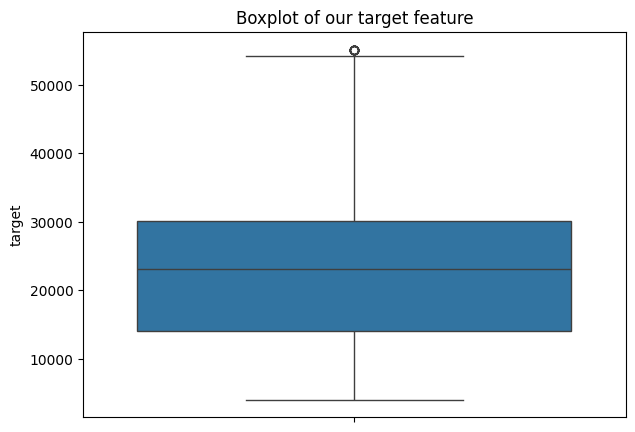

In [104]:
##
##


plt.figure(figsize = (7,5))
sns.boxplot(noodleshier_clusters['target'])
plt.title('Boxplot of our target feature')
plt.show()


In [105]:
##
## adding all the cluster values by 1, so that they become 1, 2 and 3


noodleshier_clusters['cluster'] += 1
noodleshier_clusters['cluster'].value_counts()


cluster
1    13208
2     6111
3     3815
Name: count, dtype: int64

<Figure size 1000x600 with 0 Axes>

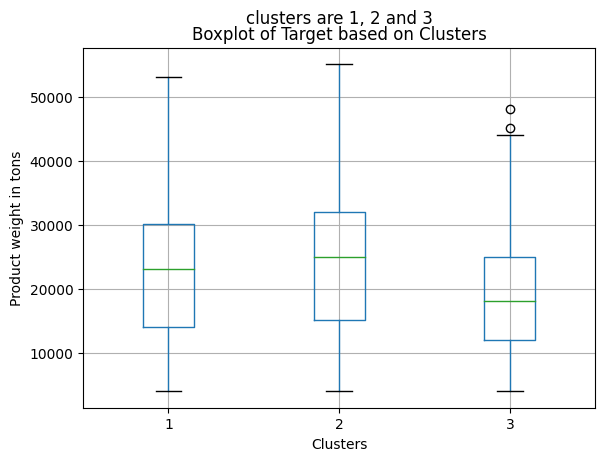

In [106]:
##
## boxplots based on clusters


plt.figure(figsize=(10, 6))
boxplot = noodleshier_clusters.boxplot(column = 'target', by = 'cluster')
plt.title('Boxplot of Target based on Clusters')
plt.suptitle('clusters are 1, 2 and 3')
plt.xlabel('Clusters')
plt.ylabel('Product weight in tons')
plt.show()

## it seems the clusters are somewhat similar but the mean seems to vary drastically.
## only cluster 3 seems to have outliers.



In [107]:
##
## descriptive statistics based on clusters


noodleshier_clusters.groupby('cluster')['target'].describe()


,count,mean,std,min,25%,50%,75%,max
cluster,,,,,,,,
1,13208.0,22939.066475,11272.544261,4058.0,14068.0,23105.0,30135.0,53141.0
2,6111.0,25063.461954,12262.968852,4071.0,15129.5,25100.0,32127.0,55151.0
3,3815.0,18363.388204,8496.678557,4055.0,12075.5,18125.0,25080.5,48071.0


In [108]:
##
## creating another feature that has only the median based on the cluster it is from

## Calculating the median of the 'target' feature for each cluster
medians = noodleshier_clusters.groupby('cluster')['target'].median().rename('median_target')

## Joining the median values back to the original DataFrame based on their cluster ('cluster' feature)
noodleshier_clusters = noodleshier_clusters.join(medians, on='cluster')
noodleshier_clusters.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23134 entries, 0 to 23133
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   cluster        23134 non-null  int64  
 1   target         23134 non-null  int64  
 2   median_target  23134 non-null  float64
dtypes: float64(1), int64(2)
memory usage: 542.3 KB


In [109]:
##
##

noodleshier_clusters.head(10)

,cluster,target,median_target
0,1,17115,23105.0
1,1,5074,23105.0
2,1,23137,23105.0
3,3,22115,18125.0
4,1,24071,23105.0
5,2,32134,25100.0
6,1,30142,23105.0
7,1,24093,23105.0
8,3,18082,18125.0
9,3,7130,18125.0


In [110]:
##
## great, now lets add the new median target feature to the original dataframe that we are working on


noodles3['target_product_wg_tons'] = noodleshier_clusters['median_target'].copy()
noodles3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23134 entries, 0 to 23133
Data columns (total 22 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Location_type                 23134 non-null  object 
 1   WH_capacity_size              23134 non-null  object 
 2   zone                          23134 non-null  object 
 3   WH_regional_zone              23134 non-null  object 
 4   num_refill_req_l3m            23134 non-null  int64  
 5   transport_issue_l1y           23134 non-null  int64  
 6   Competitor_in_mkt             23134 non-null  int64  
 7   retail_shop_num               23134 non-null  int64  
 8   wh_owner_type                 23134 non-null  object 
 9   distributor_num               23134 non-null  int64  
 10  flood_impacted                23134 non-null  int64  
 11  flood_proof                   23134 non-null  int64  
 12  electric_supply               23134 non-null  int64  
 13  d

In [111]:
##
## let us remove the original target feature


noodles3.drop('product_wg_ton', axis = 1, inplace = True)

In [112]:
##
## adding the clusters also so that it is easy to stratify for train and test

noodles3['cluster'] = noodleshier_clusters['cluster'].copy()

In [113]:

from plotly.express import parallel_coordinates

## Assuming your data is in a pandas DataFrame called 'df'
fig = parallel_coordinates(noodles3, color='target_product_wg_tons', labels=noodles3.columns[:-1])
fig.show()



### train test split the dataframe

In [114]:
##
##

from sklearn.model_selection import train_test_split


X = noodles3.drop('target_product_wg_tons', axis=1)  # Features, excluding the target
y = noodles3['target_product_wg_tons']  # Target

# Performing the train-test split without stratification
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42, stratify = X['cluster'])



In [115]:
##
## lets see how stratify has worked


print(X_train['cluster'].value_counts())
print(X_test['cluster'].value_counts())

cluster
1    8849
2    4094
3    2556
Name: count, dtype: int64
cluster
1    4359
2    2017
3    1259
Name: count, dtype: int64


In [116]:
##
## now that the stratify part is satisfied lets remove the cluster feature from the train and test dataframe


X_train.drop('cluster', axis = 1, inplace = True)
X_test.drop('cluster', axis = 1, inplace = True)

In [117]:
##
## now lets see the shape of train and test


print(X_train.shape)
print(X_test.shape)

(15499, 20)
(7635, 20)


### now lets classify


In [118]:
##
## first lets numericize categories



X_train_encoded = pd.get_dummies(X_train, columns=['Location_type', 'wh_owner_type', 'WH_capacity_size', 'zone', 'WH_regional_zone'], drop_first = True)
X_train_encoded.head()


,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,retail_shop_num,distributor_num,flood_impacted,flood_proof,electric_supply,dist_from_hub,workers_num,...,WH_capacity_size_Mid,WH_capacity_size_Small,zone_North,zone_South,zone_West,WH_regional_zone_Zone 2,WH_regional_zone_Zone 3,WH_regional_zone_Zone 4,WH_regional_zone_Zone 5,WH_regional_zone_Zone 6
17499,0,1,2,4604,25,0,0,0,76,24.0,...,False,False,True,False,False,False,False,False,False,True
6583,3,3,4,4624,51,0,0,1,56,20.0,...,False,True,True,False,False,False,False,False,False,True
1473,2,0,3,4671,32,0,0,1,262,29.0,...,False,True,False,True,False,False,False,False,False,False
12464,1,0,3,4021,31,0,0,1,114,31.0,...,False,False,False,True,False,False,False,False,True,False
19122,8,1,3,3904,20,0,0,1,166,36.0,...,False,False,True,False,False,False,False,False,False,True


In [119]:
##
## for goverment certificate

grade_order = {'C': 1, 'B': 2, 'B+': 3, 'A': 4, 'A+': 5}
X_train_encoded['approved_wh_govt_certificate_encoded'] = X_train_encoded['approved_wh_govt_certificate'].map(grade_order)
X_train_encoded.drop('approved_wh_govt_certificate', inplace = True, axis = 1)
X_train_encoded['approved_wh_govt_certificate_encoded'].head()

17499    2
6583     4
1473     4
12464    2
19122    2
Name: approved_wh_govt_certificate_encoded, dtype: int64

In [120]:
##
## lets do the same for test too



X_test_encoded = pd.get_dummies(X_test, columns=['Location_type', 'wh_owner_type', 'WH_capacity_size', 'zone', 'WH_regional_zone'], drop_first = True)
X_test_encoded.head()


,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,retail_shop_num,distributor_num,flood_impacted,flood_proof,electric_supply,dist_from_hub,workers_num,...,WH_capacity_size_Mid,WH_capacity_size_Small,zone_North,zone_South,zone_West,WH_regional_zone_Zone 2,WH_regional_zone_Zone 3,WH_regional_zone_Zone 4,WH_regional_zone_Zone 5,WH_regional_zone_Zone 6
19372,6,1,3,4706,40,0,0,0,67,29.0,...,False,False,True,False,False,False,False,False,False,True
3191,1,1,3,5295,39,1,0,1,270,41.0,...,True,False,False,False,True,False,True,False,False,False
17569,7,0,3,5215,63,0,0,0,110,29.0,...,False,True,True,False,False,False,False,False,False,True
21747,4,1,5,4445,65,0,0,0,98,15.0,...,False,False,True,False,False,False,False,False,False,True
18700,5,0,2,4855,58,0,0,1,81,27.0,...,False,False,False,True,False,False,False,False,True,False


In [121]:
##
## for goverment certificate

grade_order = {'C': 1, 'B': 2, 'B+': 3, 'A': 4, 'A+': 5}
X_test_encoded['approved_wh_govt_certificate_encoded'] = X_test_encoded['approved_wh_govt_certificate'].map(grade_order)
X_test_encoded.drop('approved_wh_govt_certificate', inplace = True, axis = 1)
X_test_encoded['approved_wh_govt_certificate_encoded'].head()

19372    1
3191     4
17569    2
21747    4
18700    5
Name: approved_wh_govt_certificate_encoded, dtype: int64

In [122]:
##
##

from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report



dt_clf = DecisionTreeClassifier(random_state=42)


param_grid = {
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}


grid_search = GridSearchCV(estimator=dt_clf, param_grid=param_grid, cv=5, verbose=2, scoring='accuracy')


grid_search.fit(X_train_encoded, y_train)

## Best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

## Predictions with the best found parameters
best_dt_clf = grid_search.best_estimator_
best_dt_clf_predictions = best_dt_clf.predict(X_test_encoded)

## Evaluation
accuracy = accuracy_score(y_test, best_dt_clf_predictions)
print("Accuracy:", accuracy)
print("Classification Report:\n", classification_report(y_test, best_dt_clf_predictions))



Fitting 5 folds for each of 54 candidates, totalling 270 fits
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=5; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=5; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=5; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=5; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=5; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=10; total time=   0.0s
[C

In [123]:
##
##

from sklearn.ensemble import RandomForestClassifier


rf_clf = RandomForestClassifier(random_state=42)


param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}


grid_search = GridSearchCV(estimator=rf_clf, param_grid=param_grid, cv=5, verbose=2, scoring='accuracy')


grid_search.fit(X_train_encoded, y_train)

## Best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

## Predictions with the best found parameters
best_rf_clf = grid_search.best_estimator_
best_rf_clf_predictions = best_rf_clf.predict(X_test_encoded)

## Evaluation
accuracy = accuracy_score(y_test, best_rf_clf_predictions)
print("Accuracy:", accuracy)
print("Classification Report:\n", classification_report(y_test, best_rf_clf_predictions))




Fitting 5 folds for each of 108 candidates, totalling 540 fits
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.7s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.7s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.6s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.7s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.6s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   1.3s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   1.2s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   1.3s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   1.5s
[CV] END max_de

In [124]:
##
##

import xgboost as xgb


param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [4, 6, 8],
    'colsample_bytree': [0.7, 0.8],
    'subsample': [0.7, 0.8]
}


## mapping only for xgb
mapping = {18125.0: 0, 23105.0: 1, 25100.0: 2}
y_train_encoded_xgb = y_train.map(mapping)
y_test_encoded_xgb = y_test.map(mapping)


xgb_clf = xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')


grid_search_xgb = GridSearchCV(estimator=xgb_clf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)


grid_search_xgb.fit(X_train_encoded, y_train_encoded_xgb)

# Best parameters and score
print("Best Parameters for XGBoost:", grid_search_xgb.best_params_)
print("Best Score for XGBoost:", grid_search_xgb.best_score_)

# Predictions and evaluation
best_xgb = grid_search_xgb.best_estimator_
best_xgb_predictions = grid_search_xgb.predict(X_test_encoded)
print("Accuracy for XGBoost:", accuracy_score(y_test_encoded_xgb, best_xgb_predictions))
print("Classification Report for XGBoost:\n", classification_report(y_test_encoded_xgb, best_xgb_predictions))





Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best Parameters for XGBoost: {'colsample_bytree': 0.8, 'learning_rate': 0.2, 'max_depth': 8, 'n_estimators': 100, 'subsample': 0.8}
Best Score for XGBoost: 0.994193111201324
Accuracy for XGBoost: 0.9933202357563851
Classification Report for XGBoost:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98      1259
           1       1.00      1.00      1.00      4359
           2       0.99      1.00      0.99      2017

    accuracy                           0.99      7635
   macro avg       0.99      0.99      0.99      7635
weighted avg       0.99      0.99      0.99      7635



In [125]:
##
##

from sklearn.neighbors import KNeighborsClassifier



param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}


knn_clf = KNeighborsClassifier()


grid_search_knn = GridSearchCV(estimator=knn_clf, param_grid=param_grid_knn, cv=5, n_jobs=-1, verbose=2)

# Fitting GridSearchCV
grid_search_knn.fit(X_train_encoded, y_train)

# Best parameters and score
print("Best Parameters for KNN:", grid_search_knn.best_params_)
print("Best Score for KNN:", grid_search_knn.best_score_)

# Predictions and evaluation
best_knn = grid_search_knn.best_estimator_
best_knn_predictions = grid_search_knn.predict(X_test_encoded)
print("Accuracy for KNN:", accuracy_score(y_test, best_knn_predictions))
print("Classification Report for KNN:\n", classification_report(y_test, best_knn_predictions))



Fitting 5 folds for each of 16 candidates, totalling 80 fits
Best Parameters for KNN: {'metric': 'manhattan', 'n_neighbors': 9, 'weights': 'distance'}
Best Score for KNN: 0.5537778888090851
Accuracy for KNN: 0.554158480681074
Classification Report for KNN:
               precision    recall  f1-score   support

     18125.0       0.31      0.07      0.12      1259
     23105.0       0.59      0.87      0.70      4359
     25100.0       0.38      0.18      0.24      2017

    accuracy                           0.55      7635
   macro avg       0.43      0.37      0.35      7635
weighted avg       0.49      0.55      0.49      7635



In [126]:
##
##

from sklearn.naive_bayes import MultinomialNB


param_grid = {
    'alpha': [0.01, 0.1, 1.0, 10.0]
}

nb_clf = MultinomialNB()

grid_search_NB = GridSearchCV(estimator=nb_clf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

grid_search_NB.fit(X_train_encoded, y_train)


##Best parameters and score
print("Best Parameters for Naive Bayes:", grid_search_NB.best_params_)
print("Best Score for Naive Bayes:", grid_search_NB.best_score_)

# Predictions and evaluation
best_NB = grid_search_NB.best_estimator_
best_NB_predictions = grid_search_NB.predict(X_test_encoded)
print("Accuracy for Naive bayes:", accuracy_score(y_test, best_NB_predictions))
print("Classification Report for Naive bayes:\n", classification_report(y_test, best_NB_predictions))



Fitting 5 folds for each of 4 candidates, totalling 20 fits
Best Parameters for Naive Bayes: {'alpha': 10.0}
Best Score for Naive Bayes: 0.8794767302667875
Accuracy for Naive bayes: 0.8856581532416503
Classification Report for Naive bayes:
               precision    recall  f1-score   support

     18125.0       0.66      0.84      0.74      1259
     23105.0       0.97      0.90      0.93      4359
     25100.0       0.90      0.88      0.89      2017

    accuracy                           0.89      7635
   macro avg       0.84      0.87      0.85      7635
weighted avg       0.90      0.89      0.89      7635



In [127]:
##
##

from sklearn.ensemble import GradientBoostingClassifier

"""
param_grid_gb = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5]
}


gb_clf = GradientBoostingClassifier(random_state=42)


grid_search_gb = GridSearchCV(estimator=gb_clf, param_grid=param_grid_gb, cv=5, n_jobs=-1, verbose=2)


grid_search_gb.fit(X_train_encoded, y_train)

## Best parameters and score
print("Best Parameters for Gradient Boosting:", grid_search_gb.best_params_)
print("Best Score for Gradient Boosting:", grid_search_gb.best_score_)

## Predictions and evaluation
best_gb = grid_search_gb.best_estimator_
best_gb_predictions = best_gb.predict(X_test_encoded)
print("Gradient Boosting Accuracy:", accuracy_score(y_test, best_gb_predictions))
print("Gradient Boosting Classification Report:\n", classification_report(y_test, best_gb_predictions))


"""

## the below is the output of the above grid-search code, the code runs for more than *_*
## 20 minutes hence commenting them out.


"""
Fitting 5 folds for each of 27 candidates, totalling 135 fits
Best Parameters for Gradient Boosting: {'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 200}
Best Score for Gradient Boosting: 0.9943865971333103
Gradient Boosting Accuracy: 0.9944990176817289
Gradient Boosting Classification Report:
               precision    recall  f1-score   support

     18125.0       0.98      0.98      0.98      1259
     23105.0       1.00      1.00      1.00      4359
     25100.0       0.99      1.00      1.00      2017

    accuracy                           0.99      7635
   macro avg       0.99      0.99      0.99      7635
weighted avg       0.99      0.99      0.99      7635

"""


"\nFitting 5 folds for each of 27 candidates, totalling 135 fits\nBest Parameters for Gradient Boosting: {'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 200}\nBest Score for Gradient Boosting: 0.9943865971333103\nGradient Boosting Accuracy: 0.9944990176817289\nGradient Boosting Classification Report:\n               precision    recall  f1-score   support\n\n     18125.0       0.98      0.98      0.98      1259\n     23105.0       1.00      1.00      1.00      4359\n     25100.0       0.99      1.00      1.00      2017\n\n    accuracy                           0.99      7635\n   macro avg       0.99      0.99      0.99      7635\nweighted avg       0.99      0.99      0.99      7635\n\n"

In [128]:
##
##

from sklearn.svm import SVC


"""


param_grid_svm = {
    'C': [0.1, 1, 10],
    'gamma': ['scale', 'auto'],
    'kernel': ['linear', 'rbf']
}


svm_clf = SVC(random_state=42)


grid_search_svm = GridSearchCV(estimator=svm_clf, param_grid=param_grid_svm, cv=5, n_jobs=-1, verbose=2)


grid_search_svm.fit(X_train_encoded, y_train)

# Best parameters and score
print("Best Parameters for SVM:", grid_search_svm.best_params_)
print("Best Score for SVM:", grid_search_svm.best_score_)

# Predictions and evaluation
best_svm = grid_search_svm.best_estimator_
best_svm_predictions = best_svm.predict(X_test_encoded)
print("SVM Accuracy:", accuracy_score(y_test, best_svm_predictions))
print("SVM Classification Report:\n", classification_report(y_test, best_svm_predictions))


"""

## the below is the output for the above code, the execution time was longer than 1 hour hence commenting

"""
Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best Parameters for SVM: {'C': 1, 'gamma': 'scale', 'kernel': 'linear'}
Best Score for SVM: 0.9652882615620022
SVM Accuracy: 0.962671905697446
SVM Classification Report:
               precision    recall  f1-score   support

     18125.0       0.87      0.90      0.89      1259
     23105.0       0.98      0.98      0.98      4359
     25100.0       0.97      0.97      0.97      2017

    accuracy                           0.96      7635
   macro avg       0.94      0.95      0.95      7635
weighted avg       0.96      0.96      0.96      7635
"""

"\nFitting 5 folds for each of 12 candidates, totalling 60 fits\nBest Parameters for SVM: {'C': 1, 'gamma': 'scale', 'kernel': 'linear'}\nBest Score for SVM: 0.9652882615620022\nSVM Accuracy: 0.962671905697446\nSVM Classification Report:\n               precision    recall  f1-score   support\n\n     18125.0       0.87      0.90      0.89      1259\n     23105.0       0.98      0.98      0.98      4359\n     25100.0       0.97      0.97      0.97      2017\n\n    accuracy                           0.96      7635\n   macro avg       0.94      0.95      0.95      7635\nweighted avg       0.96      0.96      0.96      7635\n"